
# Problem Statement Understanding :

This is an email campgain problem statement.  

### Key Metrics :

1. Conversions is considered as KPI - “Conversions can include clicking on a link in the email and making a purchase or filling out a form.”
2. It give you unique insight into your return on investment.When you know how much you have spent and how many subscribers are converting, it’s easier to determine whether or not the money you are putting into your campaign is paying off.

***Data Under Standing :***

1. The total number of rows 567646 and columns 34 in data
2. In Missing values treatment,the columns such as (subject_b,next_send,ab_evalution)has around 97%
   missing values in it. Hence dropping it.
3. Other columns such as (subject,conversions_b,use_ab,ab_percentage,visits_b) has very minimal missing values . Hence    filled it with 0 and mean values.
4. Assuming Performing or not Performing A/B test, I can relate in two ways customers are clustered in campagain.
    False -> 553898
    True -> 13748

***Data Transformation :***

5. All the columns in dataframe has integer values but the type was in object and performing necessary transformation      on the columns to bring to desired type.
   By replacing values and converting to dtypes.
6. A/B testing is done in the column use_ab where for most of data it is FALSE(553898) and for some of data it is          TRUE(13748)

7. Not able to get A/B testing subject. So considering following assumptions:

***Key Observation***

1. Conversions can be increased and it is viewed and clicked most of times when subject is small.
2. There is a key difference between two hypothesis A/B testing between ('sent_a', 'opens_a', 'reads_a', 'clicks_a',      'visits_a', 'conversions_a' -> 'A/B testing is FALSE ') and ( 'sent_b', 'opens_b', 'reads_b', 'clicks_b',        '      'visits_b', 'conversions_b' -> 'A/B testing is TRUE ')
3. 'A/B testing is FALSE ' the values are constant through out the features.
4. 'A/B testing is TRUE ' there is a significant change in the features.
5. When clicks, opens , reads and visits are more. obviously conversions rate are good.
6. These can be further increased when A/B testing subject is understood and based on it . May be key metrics can          change which leads in better understanding of data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\VigneshSS\An

In [13]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
data = pd.read_csv('data_analytics.csv', header=None,error_bad_lines=False)

b'Skipping line 212202: expected 37 fields, saw 38\n'
b'Skipping line 255163: expected 37 fields, saw 38\nSkipping line 258525: expected 37 fields, saw 38\nSkipping line 259516: expected 37 fields, saw 38\n'
b'Skipping line 266952: expected 37 fields, saw 38\n'
b'Skipping line 280432: expected 37 fields, saw 38\nSkipping line 280452: expected 37 fields, saw 38\nSkipping line 294791: expected 37 fields, saw 38\n'
b'Skipping line 307203: expected 37 fields, saw 38\n'
b'Skipping line 320017: expected 37 fields, saw 38\nSkipping line 325502: expected 37 fields, saw 38\n'
b'Skipping line 328300: expected 37 fields, saw 38\nSkipping line 332865: expected 37 fields, saw 38\nSkipping line 334114: expected 37 fields, saw 38\nSkipping line 334363: expected 37 fields, saw 38\n'
b'Skipping line 356334: expected 37 fields, saw 38\n'
b'Skipping line 366655: expected 37 fields, saw 38\n'
b'Skipping line 413217: expected 37 fields, saw 38\n'
b'Skipping line 428678: expected 37 fields, saw 38\nSkipping

# DataCleansing

In [15]:
data.rename(columns = {0 : 'id_customer', 1 :'id_agency_customer',2:'id_message',3:'id_send',4:'date',5:'subject',6:'use_ab',7:'subject_b',
                                                   8:'id_message_b',9:'ab_percentage',10:'ab_evalution',11:'next_send',12:'sent',13:'bounced',14:'opens',
                                                   15:'reads',16:'clicks',17:'visits',18:'conversions',19:'revenues',20:'prints',21:'previews',22:'forwards',
                                                   23:'spam_reports',24:'unsubscribes',25:'sent_a',26:'opens_a',27:'reads_a',28:'clicks_a',29:'visits_a',
                                                   30:'conversions_a',31:'sent_b',32:'opens_b',33:'reads_b',34:'clicks_b',35:'visits_b',36:'conversions_b'}, inplace = True)

In [16]:
data.drop(index = 0, axis =0, inplace = True)

In [17]:
print('The total number of rows {} and columns {} in data'.format(data.shape[0], data.shape[1]))

The total number of rows 567647 and columns 37 in data


In [18]:
data['use_ab'].value_counts()

False                                                                 522153
FALSE                                                                  31743
True                                                                   12724
TRUE                                                                    1023
 Žádost o připojení se k mezinárodní kampani „Vlajka pro Tibet",0"         1
Name: use_ab, dtype: int64

In [19]:
#Checking for duplicate values in dataframe
data['id_customer'].duplicated().any()  #There is duplicate values in Dataframe.
#Command for Dropping it
data.drop_duplicates(subset =None, 
                     keep = False, inplace = True)   # For Now not Dropping duplicate values 

In [20]:
print('The rows of Dataframe is {} and column in Dataframe is {}'.format(data.shape[0], data.shape[1]))

The rows of Dataframe is 567647 and column in Dataframe is 37


In [21]:
data.head(1)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,subject_b,id_message_b,ab_percentage,ab_evalution,next_send,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
1,5,0,10,41,2005-12-08 21:03:59,Airfoil PR NEWS,FALSE,NaN,0,0,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [22]:
#Missing Vaues Treatment
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)  
df2 = data.dtypes.to_frame().rename(columns = {1:'Dtypes'})
missing_data = pd.concat([total, percent,df2], axis=1, keys=['Total', 'Percent','Dtypes'])
missing_data.head()

,Total,Percent,Dtypes
,0,1,0
subject_b,553961,97.588995,object
next_send,553901,97.578425,object
ab_evalution,553837,97.567150,object
subject,4507,0.793979,object
conversions_b,4,0.000705,object


In [23]:
# Dropping three columns since it has more than 97% missing values in it 
data.drop(['subject_b','next_send','ab_evalution'], axis =1, inplace = True)

In [24]:
#treating Missing Values in use_ab Column
data['use_ab'] = data['use_ab'].fillna(method = 'ffill') 
data['subject']= data['subject'].fillna(method = 'ffill').fillna(method = 'bfill')

# Data Transformation

In [25]:
data['use_ab'] = data['use_ab'].replace({False: 'FALSE', True : 'TRUE'})
data['use_ab'] = data['use_ab'].replace({'FALSE' :False, 'TRUE': True })

In [26]:
new_DataFrame = data[(data['use_ab'] !=False) & (data['use_ab'] !=True)]

In [27]:
index_names = new_DataFrame.index

In [28]:
data.drop(index_names, inplace = True) 

In [29]:
data['ab_percentage'] = data['ab_percentage'].fillna(0)
data['conversions_b']= data['conversions_b'].astype(float)
data['conversions_b']= data['conversions_b'].fillna(0)

In [30]:
#Mapping False to 0 and True to 1
map_dict = {False:0, True:1}
data['use_ab'] = data['use_ab'].map(map_dict)

In [31]:
df = data.copy()

In [32]:
df['sent'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['revenues'] = df['revenues'].replace({.00 :0, '0.00' : 0})
df['bounced'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['opens'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['reads'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['clicks'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['conversions'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['prints'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['previews'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['forwards'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['spam_reports'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['unsubscribes'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['conversions'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['sent_a'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['opens_a'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['reads_a'] = df['reads_a'].replace({'0.00' : 0, 0.0:0})
df['clicks_a'] = df['clicks_a'].replace({'0.00' : 0, 0.0:0})
df['visits_a'] = df['visits_a'].replace({'0.00' : 0, 0.0:0})
df['conversions_a'] = df['conversions_a'].replace({'0.00' : 0, 0.0:0})
df['sent_b'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['opens_b'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['reads_b'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['clicks_b'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['visits_b'].replace({'0.00' : 0, 0.0:0}, inplace = True)
df['conversions_b'] = df['conversions_b'].replace({0.00 : 0, 0.0:0})

In [33]:
df['use_ab'].value_counts()

0    553898
1     13748
Name: use_ab, dtype: int64

# A/B Testing

In [34]:
#Dealing with customers where A/B test is not tested
df_use_ab_0 = df[df['use_ab']==0]

In [35]:
#Dealing with customers where A/B test is tested
df_use_ab_1 = df[df['use_ab']!=0]

In [36]:
df_use_ab_0.shape , df_use_ab_1.shape  # Dealing with One part of Data where A/B testing is FALSE

((553898, 34), (13748, 34))

# Dealing with One part of Data where A/B testing is FALSE

In [37]:
#Top 100 customers data
df_use_ab_0_top100_usersid = df_use_ab_0.id_customer.value_counts()[:100].index.tolist()
df_use_ab_0_after_100_Extraction = df_use_ab_0[df_use_ab_0['id_customer'].isin(df_use_ab_0_top100_usersid)]

#Shape of dataframe with 
df_use_ab_0_after_100_Extraction.shape

(528984, 34)

In [38]:
#Top 50 Subjects (email subject)
df_use_ab_0_top100_Subjects = df_use_ab_0_after_100_Extraction.subject.value_counts().to_frame()[:100].index.tolist()
df_use_ab_0_after_100_Subject_Extraction = df_use_ab_0_after_100_Extraction[df_use_ab_0_after_100_Extraction['subject'].isin(df_use_ab_0_top100_Subjects)]

#Shape of dataframe with 
df_use_ab_0_after_100_Subject_Extraction.shape

(237134, 34)

In [39]:
df_use_ab_0_after_100_Subject_Extraction.head(2)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
13211,3138,0,7641,163382,2011-12-14 17:54:02,Nová platforma na slovenskom trhu,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
13215,3138,0,7655,163740,2011-12-15 09:29:02,Nová platforma na slovenskom trhu,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [40]:
df_1 = df_use_ab_0_after_100_Subject_Extraction.copy()

In [41]:
df_1['visits'].value_counts()[:5]

0.0    162640
1.0     22871
2.0      9768
3.0      6596
4.0      4953
Name: visits, dtype: int64

<AxesSubplot:xlabel='conversions', ylabel='count'>

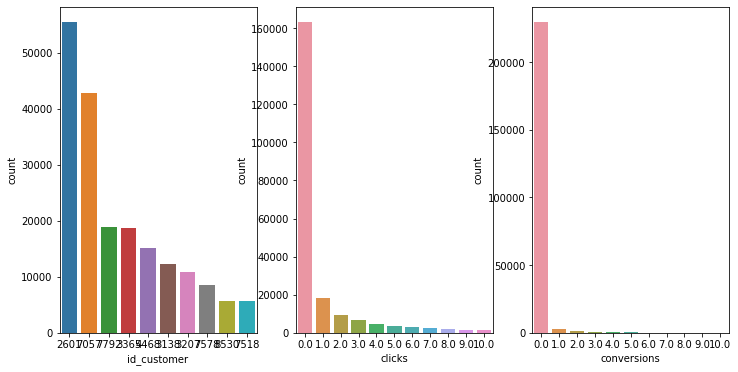

In [42]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(12,6))
plt.subplot(131)
sns.countplot(df_1['id_customer'], order = df_1['id_customer'].value_counts(dropna = False)[:10].index)
plt.subplot(132)
sns.countplot(df_1['clicks'], order = df_1['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(133)
sns.countplot(df_1['conversions'], order = df_1['conversions'].value_counts(dropna = False)[:10].index)

In [43]:
#To view top 10 customers clicks,opens data

#Top 100 customers data
df_use_ab_0_top10_usersid = df_1.id_customer.value_counts()[:10].index.tolist()
df_use_ab_0_after_10_Extraction = df_1[df_1['id_customer'].isin(df_use_ab_0_top10_usersid)]

#Shape of dataframe with 
df_use_ab_0_after_10_Extraction.shape

(194456, 34)

In [44]:
df_use_ab_0_after_10_Extraction.head(2)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
16409,3138,0,7675,181070,2012-02-15 10:00:02,Nová platforma na slovenskom trhu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
16410,3138,0,7687,181071,2012-02-15 10:00:02,Nová platforma na slovenskom trhu,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [45]:
#Customers part of this dataset.
df_use_ab_0_after_10_Extraction.date.min(), df_use_ab_0_after_10_Extraction.date.max()

('2012-02-15 10:00:02', '2018-04-16 15:00:38')

<AxesSubplot:xlabel='conversions_a', ylabel='count'>

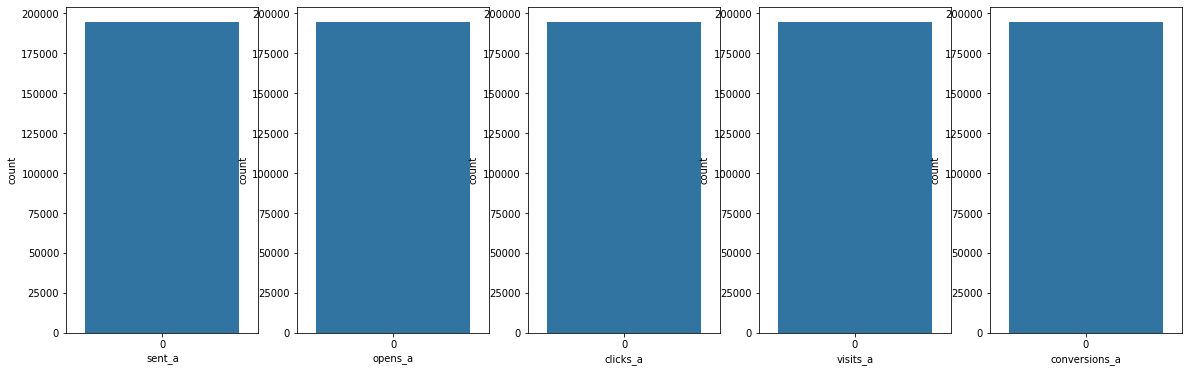

In [46]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,6))
plt.subplot(151)
sns.countplot(df_use_ab_0_after_10_Extraction['sent_a'], order = df_use_ab_0_after_10_Extraction['sent_a'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_use_ab_0_after_10_Extraction['opens_a'], order = df_use_ab_0_after_10_Extraction['opens_a'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_use_ab_0_after_10_Extraction['clicks_a'], order = df_use_ab_0_after_10_Extraction['clicks_a'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_use_ab_0_after_10_Extraction['visits_a'], order = df_use_ab_0_after_10_Extraction['visits_a'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_use_ab_0_after_10_Extraction['conversions_a'], order = df_use_ab_0_after_10_Extraction['conversions_a'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='conversions_b', ylabel='count'>

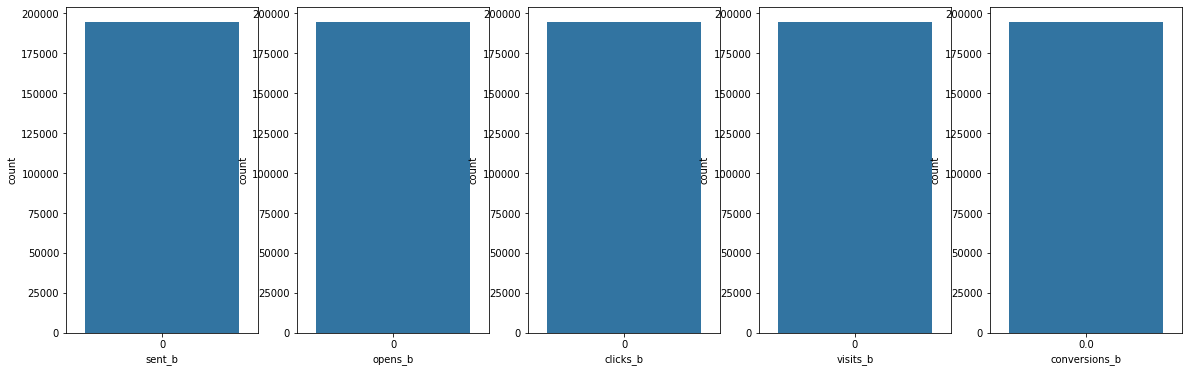

In [47]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,6))
plt.subplot(151)
sns.countplot(df_use_ab_0_after_10_Extraction['sent_b'], order = df_use_ab_0_after_10_Extraction['sent_b'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_use_ab_0_after_10_Extraction['opens_b'], order = df_use_ab_0_after_10_Extraction['opens_b'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_use_ab_0_after_10_Extraction['clicks_b'], order = df_use_ab_0_after_10_Extraction['clicks_b'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_use_ab_0_after_10_Extraction['visits_b'], order = df_use_ab_0_after_10_Extraction['visits_b'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_use_ab_0_after_10_Extraction['conversions_b'], order = df_use_ab_0_after_10_Extraction['conversions_b'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='id_send', ylabel='count'>

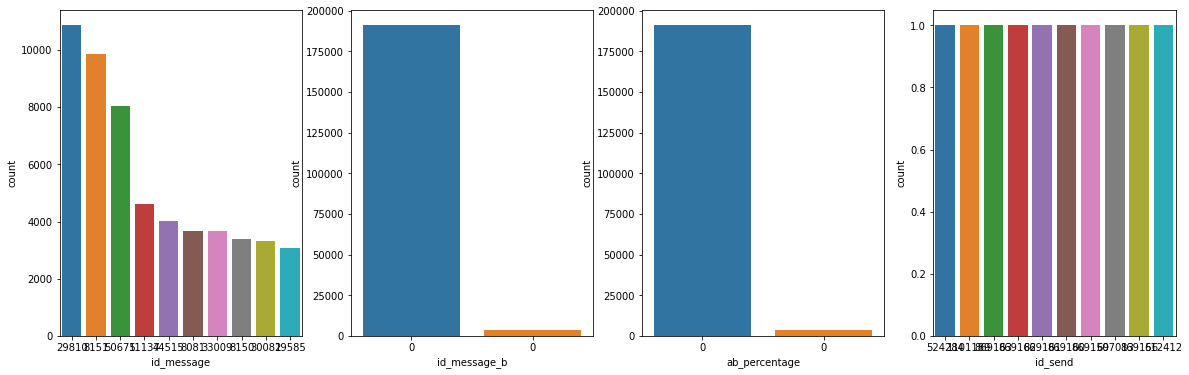

In [48]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,6))
plt.subplot(141)
sns.countplot(df_use_ab_0_after_10_Extraction['id_message'], order = df_use_ab_0_after_10_Extraction['id_message'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_0_after_10_Extraction['id_message_b'], order = df_use_ab_0_after_10_Extraction['id_message_b'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_0_after_10_Extraction['ab_percentage'], order = df_use_ab_0_after_10_Extraction['ab_percentage'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_0_after_10_Extraction['id_send'], order = df_use_ab_0_after_10_Extraction['id_send'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='reads', ylabel='count'>

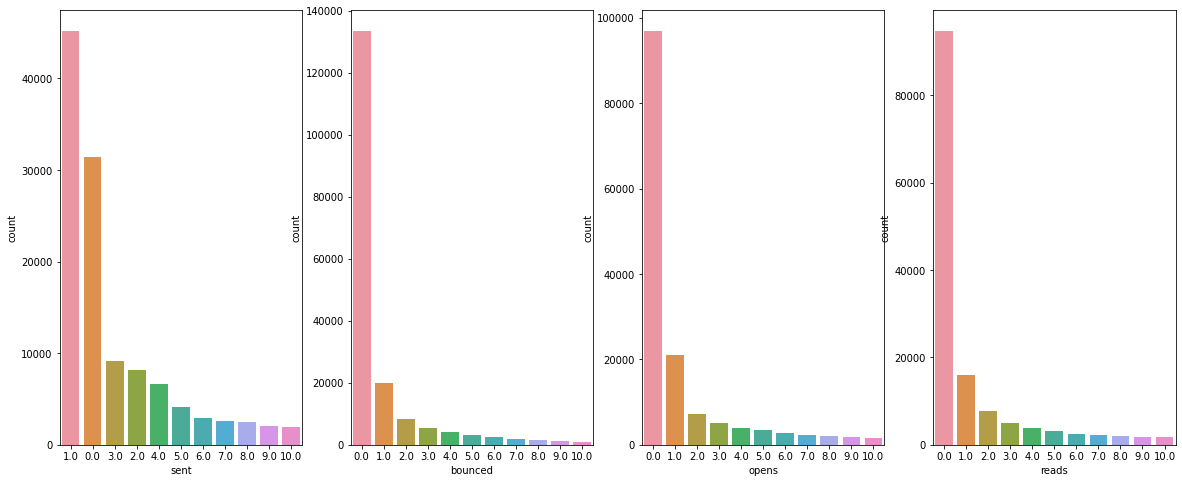

In [49]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_0_after_10_Extraction['sent'], order = df_use_ab_0_after_10_Extraction['sent'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_0_after_10_Extraction['bounced'], order = df_use_ab_0_after_10_Extraction['bounced'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_0_after_10_Extraction['opens'], order = df_use_ab_0_after_10_Extraction['opens'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_0_after_10_Extraction['reads'], order = df_use_ab_0_after_10_Extraction['reads'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='revenues', ylabel='count'>

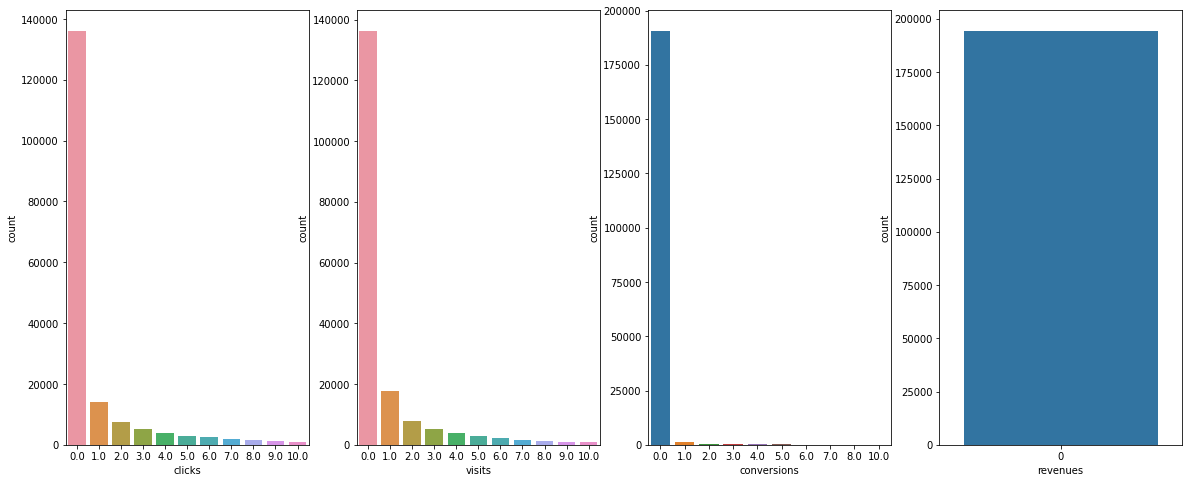

In [50]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_0_after_10_Extraction['clicks'], order = df_use_ab_0_after_10_Extraction['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_0_after_10_Extraction['visits'], order = df_use_ab_0_after_10_Extraction['visits'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_0_after_10_Extraction['conversions'], order = df_use_ab_0_after_10_Extraction['conversions'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_0_after_10_Extraction['revenues'], order = df_use_ab_0_after_10_Extraction['revenues'].value_counts(dropna = False)[:10].index)

In [51]:
df_use_ab_0_after_10_Extraction_Conversions = df_use_ab_0_after_10_Extraction[df_use_ab_0_after_10_Extraction['conversions']==1]

In [52]:
df_use_ab_0_after_10_Extraction_Conversions.columns

Index(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date', 'subject', 'use_ab', 'id_message_b', 'ab_percentage', 'sent', 'bounced', 'opens', 'reads', 'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews', 'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'], dtype='object')

In [53]:
df_use_ab_0_after_10_Extraction_Conversions.groupby(['opens','clicks','reads','visits'])[['conversions']].count().head()

conversions
opens clicks reads visits             
1.0   1.0    1.0   1.0             108
             2.0   1.0              74
             3.0   1.0              35
             4.0   1.0               4
             5.0   1.0               3

In [54]:
df_use_ab_0_after_10_Extraction_Conversions.groupby(['previews','revenues','prints'])[['conversions']].count().head()

conversions
previews revenues prints             
0        0        0              1221
                  1                 5
1        0        0                19
2        0        0                 5
3        0        0                 2

In [55]:
df_use_ab_0_after_10_Extraction_Conversions.groupby(['unsubscribes','forwards','spam_reports'])[['conversions']].count().head()

conversions
unsubscribes forwards spam_reports             
0            0        0.0                   968
                      1.0                    27
                      2.0                     2
                      3.0                     2
             1        0.0                     2

<AxesSubplot:xlabel='unsubscribes', ylabel='count'>

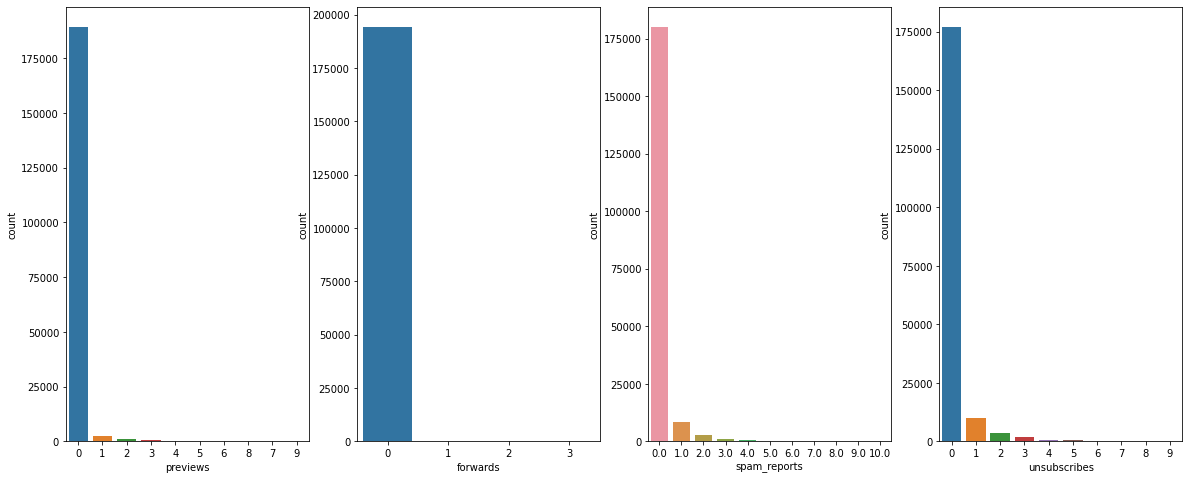

In [56]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_0_after_10_Extraction['previews'], order = df_use_ab_0_after_10_Extraction['previews'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_0_after_10_Extraction['forwards'], order = df_use_ab_0_after_10_Extraction['forwards'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_0_after_10_Extraction['spam_reports'], order = df_use_ab_0_after_10_Extraction['spam_reports'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_0_after_10_Extraction['unsubscribes'], order = df_use_ab_0_after_10_Extraction['unsubscribes'].value_counts(dropna = False)[:10].index)

### Observations : 

***df_use_ab_0(A/B testing is False)***


***Approaches :***

6. First seperating all the data where A/B testing is false. And trying to explore the causes and the result.
7. Since , it has lots of data , Concentrating on top 100 customers whose transcation has most records.
8. From the above records , now concentrating on top 100 subjects of mail.
9. All those customers are part of thr campaign from 2012-02-15 to 2018-04-16
10. From all the top 100 customers, columns like 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'
    has constant values. Since A/B testing subject is not clear. It is difficult to interpert from it. for now, can conclude that it has constant values.
11. Most used Id_message is 2981,id_send is 5243. Most of the email are sent to the customers and most of it are bounced and the opens rate is also very less . So reads rate is also very less while A/B testing is- false
12. Clicks on the mail are also very less and visits is also less. Hence conversion rate is very less for these mails.
13. It is evident that very limited people mark it as a spam and unsubscribe it.

# Exploring in Depth df_use_ab_0 with TOP customer  2601

In [57]:
df_2601 = df_use_ab_0_after_10_Extraction[df_use_ab_0_after_10_Extraction['id_customer']==2601]

In [58]:
df_2601.shape

(55495, 34)

In [59]:
df_2601.head(1)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
17208,2601,0,8089,185692,2012-02-29 06:00:46,TV Tipsport pro aktivní sázkaře!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [60]:
#Unique customer EDA
df_2601.apply(lambda x : len(x.unique())).head()

id_customer               1
id_agency_customer        1
id_message               62
id_send               55495
date                  38929
dtype: int64

In [61]:
df_2601['date'].min(), df_2601['date'].max()

('2012-02-29 06:00:46', '2018-04-16 09:53:20')

In [62]:
df_2601['ab_percentage'] = pd.to_numeric(df_2601['ab_percentage'])
df_2601['ab_percentage'] = df_2601['ab_percentage'].astype(int)  #.unique()  

In [63]:
df_2601['id_message'].value_counts()[:10]

8151     9860
11137    4574
8081     3654
8150     3398
10054    3065
11136    2433
8089     1901
34848    1871
8153     1783
8152     1781
Name: id_message, dtype: int64

In [64]:
df_use_ab_0_after_10_Extraction[df_use_ab_0_after_10_Extraction['id_customer']==2601].groupby(['id_send','sent','id_message'])['bounced'].count()

id_send  sent  id_message
185692   0.0   8089          1
185698   0.0   8152          1
185700   0.0   8153          1
185701   0.0   8150          1
185702   0.0   8151          1
                            ..
1126969  1.0   46331         1
1126970  1.0   51218         1
1126975  4.0   10054         1
1127089  14.0  24175         1
1127091  2.0   29326         1
Name: bounced, Length: 55495, dtype: int64

In [65]:
df_2601.columns

Index(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date', 'subject', 'use_ab', 'id_message_b', 'ab_percentage', 'sent', 'bounced', 'opens', 'reads', 'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews', 'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'], dtype='object')

<AxesSubplot:xlabel='conversions_a', ylabel='count'>

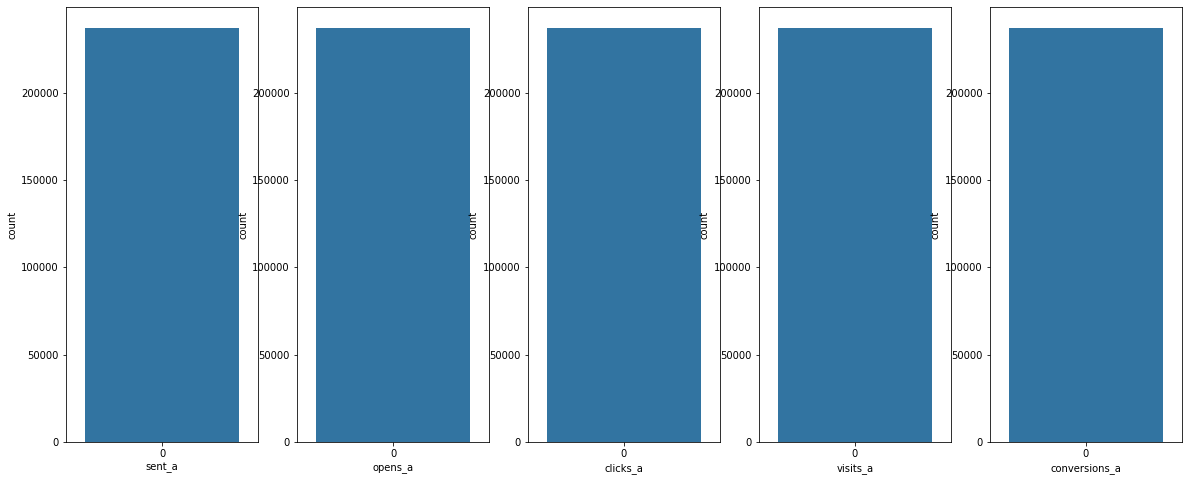

In [66]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(151)
sns.countplot(df_1['sent_a'], order = df_1['sent_a'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_1['opens_a'], order = df_1['opens_a'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_1['clicks_a'], order = df_1['clicks_a'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_1['visits_a'], order = df_1['visits_a'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_1['conversions_a'], order = df_1['conversions_a'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='conversions_b', ylabel='count'>

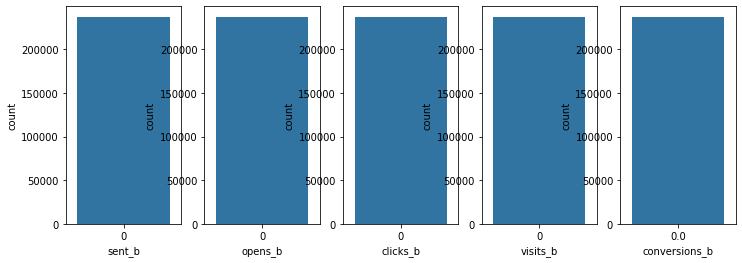

In [67]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(12,4))
plt.subplot(151)
sns.countplot(df_1['sent_b'], order = df_1['sent_b'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_1['opens_b'], order = df_1['opens_b'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_1['clicks_b'], order = df_1['clicks_b'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_1['visits_b'], order = df_1['visits_b'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_1['conversions_b'], order = df_1['conversions_b'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='id_send', ylabel='count'>

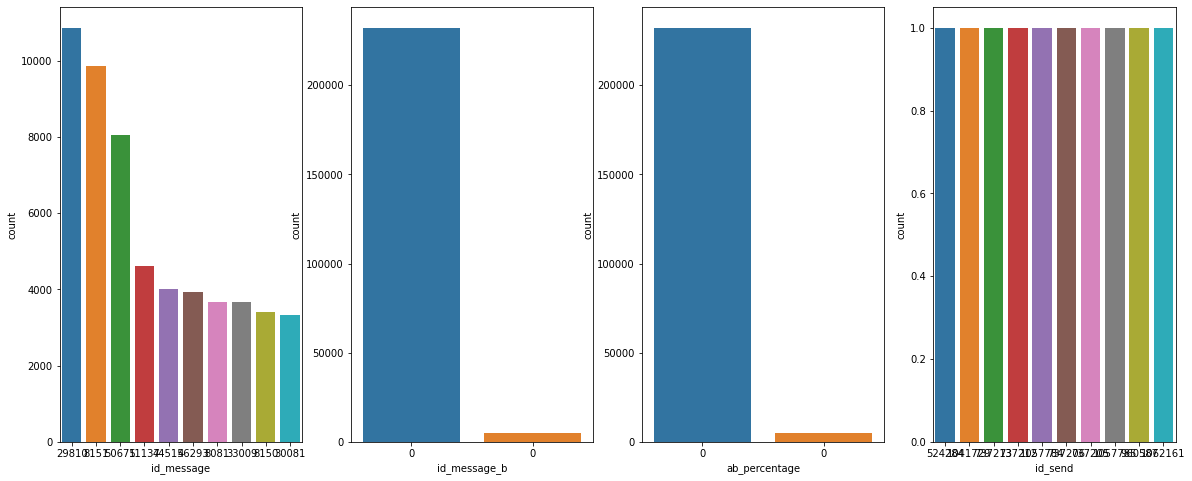

In [68]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_1['id_message'], order = df_1['id_message'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_1['id_message_b'], order = df_1['id_message_b'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_1['ab_percentage'], order = df_1['ab_percentage'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_1['id_send'], order = df_1['id_send'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='reads', ylabel='count'>

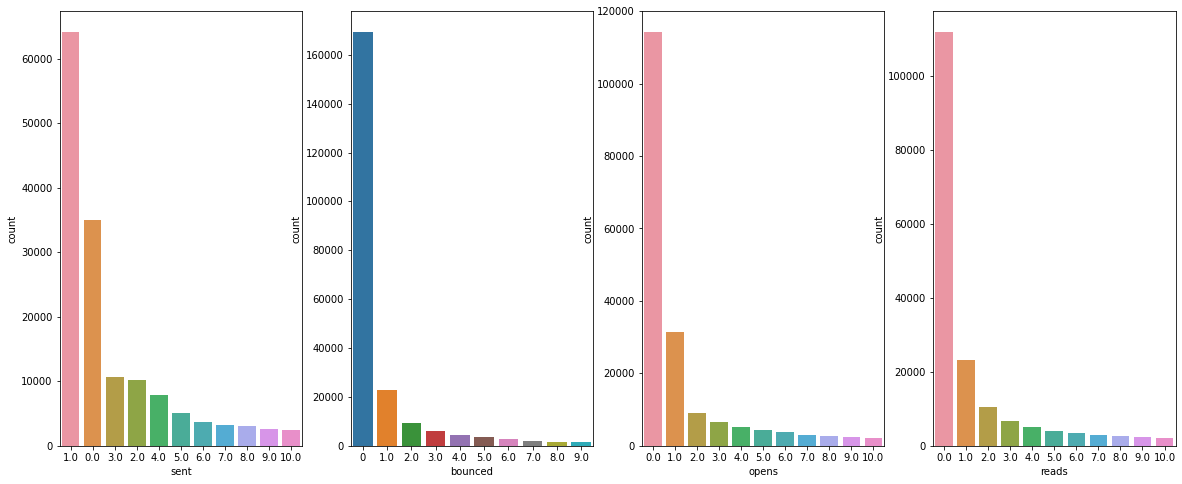

In [69]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_1['sent'], order = df_1['sent'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_1['bounced'], order = df_1['bounced'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_1['opens'], order = df_1['opens'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_1['reads'], order = df_1['reads'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='revenues', ylabel='count'>

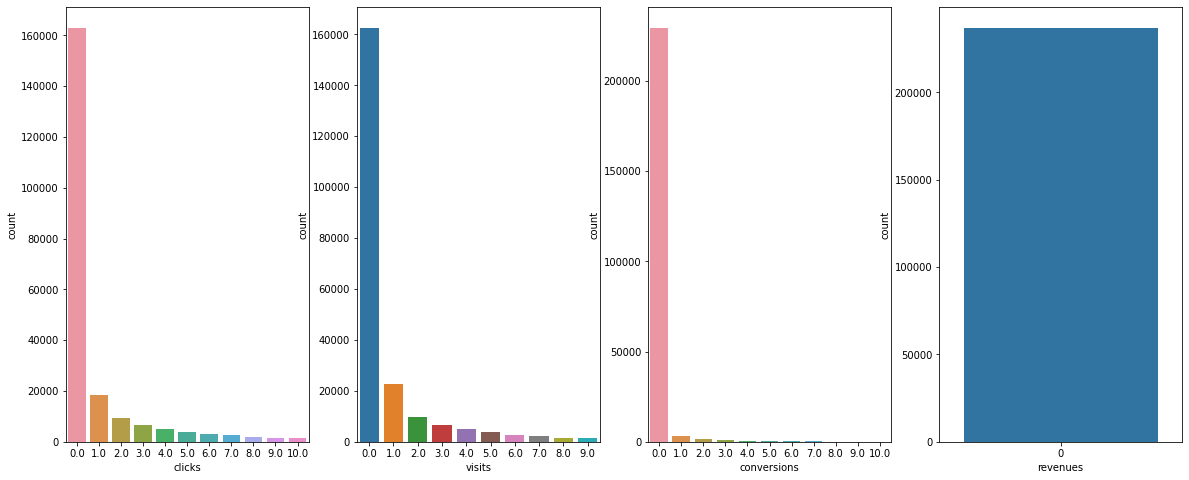

In [70]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_1['clicks'], order = df_1['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_1['visits'], order = df_1['visits'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_1['conversions'], order = df_1['conversions'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_1['revenues'], order = df_1['revenues'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='unsubscribes', ylabel='count'>

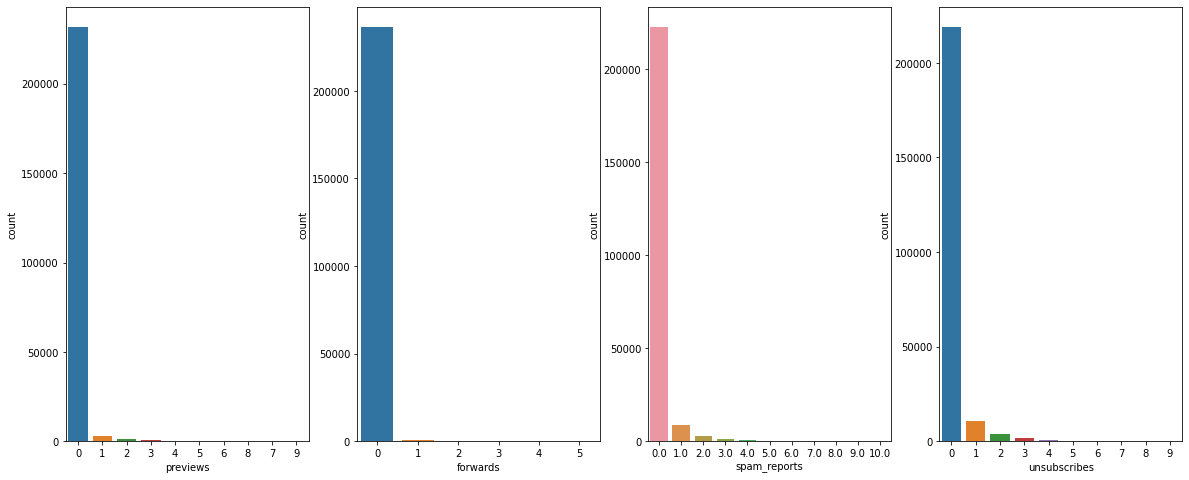

In [71]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_1['previews'], order = df_1['previews'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_1['forwards'], order = df_1['forwards'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_1['spam_reports'], order = df_1['spam_reports'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_1['unsubscribes'], order = df_1['unsubscribes'].value_counts(dropna = False)[:10].index)

# Appendix :

### With id_message 11137 and subject as Potvrzení registrace u Tipsportu ###

In [72]:
df_2601[df_2601['id_message']==11137].head(2)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
37516,2601,0,11137,260887,2012-09-03 14:24:03,Potvrzení registrace u Tipsportu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
37518,2601,0,11137,260889,2012-09-03 14:49:02,Potvrzení registrace u Tipsportu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


<AxesSubplot:>

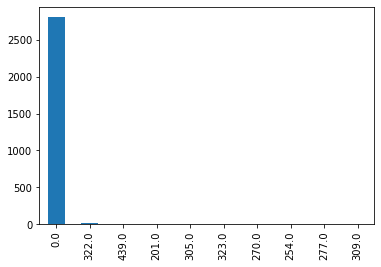

In [73]:
# Trying to plot for customer 2601 with id_message vs sent data
df_2601[df_2601['id_message']==11137]['sent'].value_counts().head(10).plot(kind='bar')  

In [74]:
df_2601[df_2601['id_message']==11137].groupby('sent')['bounced'].count().sort_values( ascending = False).head(10)

sent
0.0      2810
322.0      13
305.0       8
201.0       8
254.0       8
323.0       8
270.0       8
439.0       8
291.0       7
277.0       7
Name: bounced, dtype: int64

<AxesSubplot:>

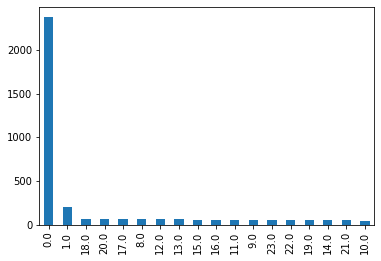

In [75]:
df_2601[df_2601['id_message']==11137]['bounced'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

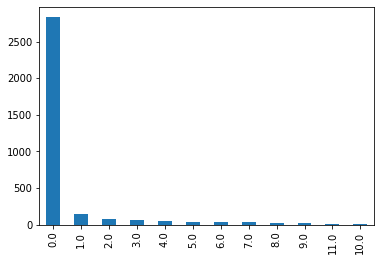

In [76]:
df_2601[df_2601['id_message']==11137]['opens'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

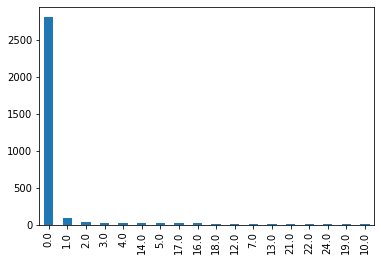

In [77]:
df_2601[df_2601['id_message']==11137]['reads'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

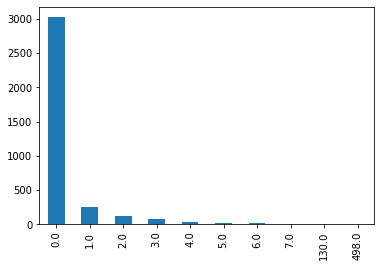

In [78]:
df_2601[df_2601['id_message']==11137]['clicks'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

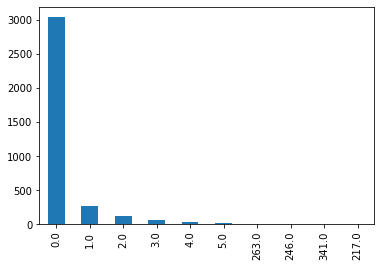

In [79]:
df_2601[df_2601['id_message']==11137]['visits'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

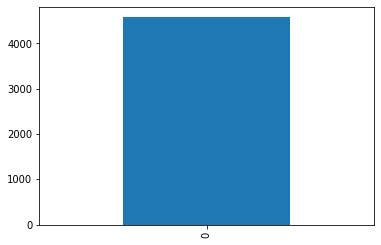

In [80]:
df_2601[df_2601['id_message']==11137]['conversions'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

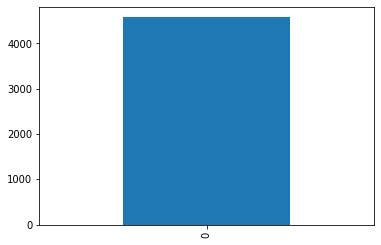

In [81]:
df_2601[df_2601['id_message']==11137]['revenues'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

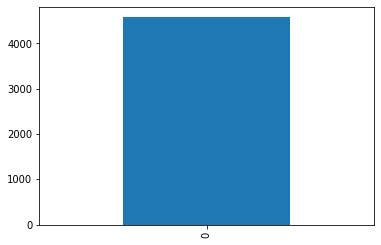

In [82]:
df_2601[df_2601['id_message']==11137]['prints'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

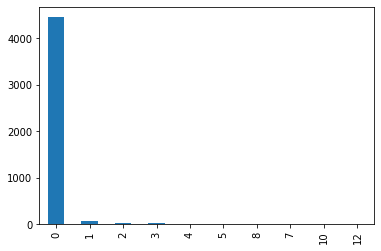

In [83]:
df_2601[df_2601['id_message']==11137]['previews'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

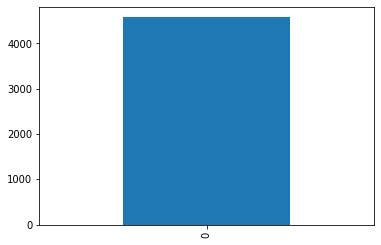

In [84]:
df_2601[df_2601['id_message']==11137]['forwards'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

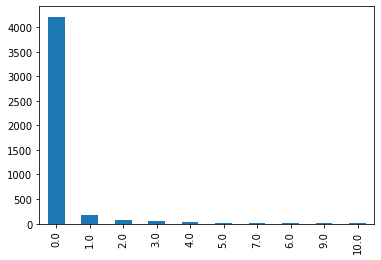

In [85]:
df_2601[df_2601['id_message']==11137]['spam_reports'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

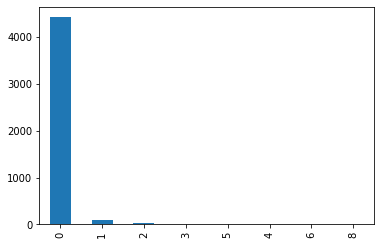

In [86]:
df_2601[df_2601['id_message']==11137]['unsubscribes'].value_counts().head(10).plot(kind='bar')

In [87]:
df_2601['sent'].value_counts(normalize = True)*100

0.0        36.183440
1.0         7.420488
2.0         4.081449
3.0         3.052527
4.0         2.565997
5.0         2.162357
6.0         1.758717
7.0         1.549689
8.0         1.464997
9.0         1.185692
10.0        1.039733
11.0        0.904586
12.0        0.807280
13.0        0.729795
14.0        0.679340
16.0        0.618074
15.0        0.596450
18.0        0.524372
17.0        0.517164
19.0        0.511758
20.0        0.452293
21.0        0.387422
22.0        0.385620
23.0        0.382016
25.0        0.362195
26.0        0.345977
24.0        0.322552
31.0        0.309938
29.0        0.304532
33.0        0.279304
30.0        0.270295
27.0        0.264889
34.0        0.261285
35.0        0.248671
32.0        0.246869
28.0        0.241463
36.0        0.225246
37.0        0.218038
38.0        0.218038
39.0        0.214434
41.0        0.212632
40.0        0.209028
44.0        0.201820
42.0        0.192810
47.0        0.187404
49.0        0.183800
48.0        0.183800
43.0        0

### Observations : 

***df_use_ab_0(A/B testing is False)***


***Approaches for 2601 customer:***

1. He is been part of 62 different campaign_id's
2. The Subject included for this customer has 34 unique
3. He's been part of the campagin from 2012-02-29 to 2018-04-16
4. AB test group size the whole is 0
5. sent columns has 36% 0 values and rest mixed of int values from ( 1 to 1680(approx))
6. After converting values other than 0 to 1,for id_message as 11137 the plot is made.
7. For id_message (8151 with subject "Blahopřejeme k svátku" it got bounced 8406 times when sent is not successful) and for successfully sent for id_message 34848 with subject
   Přijetí reklamace tiketu and got bounced 1786 times
8. For id_message (8151 with subject "Blahopřejeme k svátku" did not open 8819 times and for successfully read for id_message 11137 with subject
   Potvrzení registrace u Tipsportu and got reads 1740 times
9. For id_message (8151 with subject "Blahopřejeme k svátku" marked as spam 9860 times
10. Analyzed in depth with the customer 2601, since this id has lot of transcations in the campagain. with 55495 transcations.
11. This customer has received 2981 id_messages which is most for all the customers in this method.Most of them mails are sent to this customer where limited mails got bounced back. But customers actions on mail are limited
    by opening and reading it.And the conversions are very limited.
12. Similary same action is performed with differernt id_message(11137) for same customer.


***

# Dealing with Other part of Data where A/B testing is TRUE


***A/B testing is TRUE:***

18. The same set of action is done when A/B testing is TRUE.The counts for this method is 13748.
19. Customer with highest transacations are 9200. The numbers of clicks is very less and conversions is also less for this set of the data.
20. But the columns 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b' has significant effort in this set of data when compared with the other set of data
21. Most number of id_message for this set of data is 3847 and sent and bounced data are in good rate . But opens and reads data is less. This leads to less data in clicks and visists.

<AxesSubplot:xlabel='conversions', ylabel='count'>

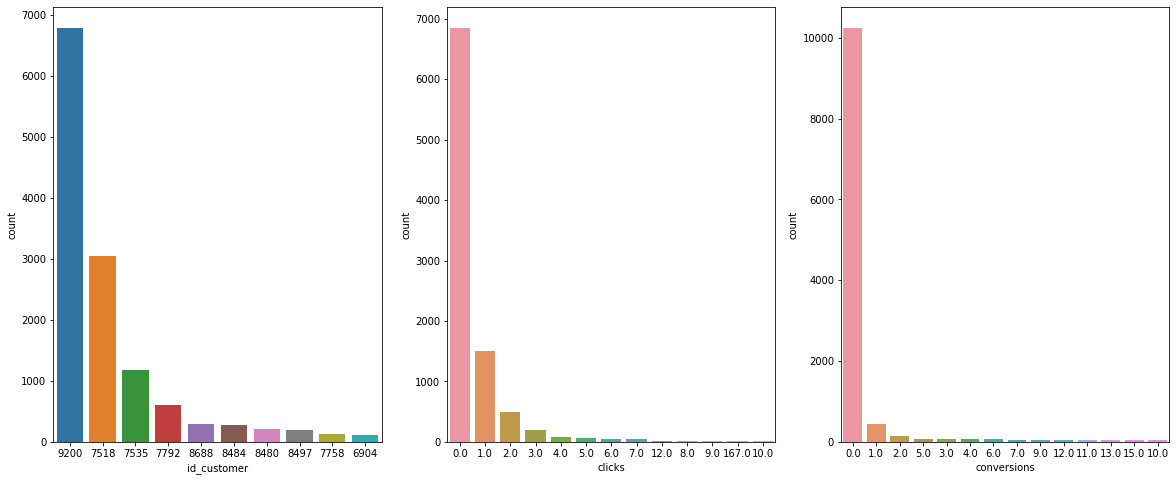

In [89]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(131)
sns.countplot(df_use_ab_1['id_customer'], order = df_use_ab_1['id_customer'].value_counts(dropna = False)[:10].index)
plt.subplot(132)
sns.countplot(df_use_ab_1['clicks'], order = df_use_ab_1['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(133)
sns.countplot(df_use_ab_1['conversions'], order = df_use_ab_1['conversions'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='conversions_a', ylabel='count'>

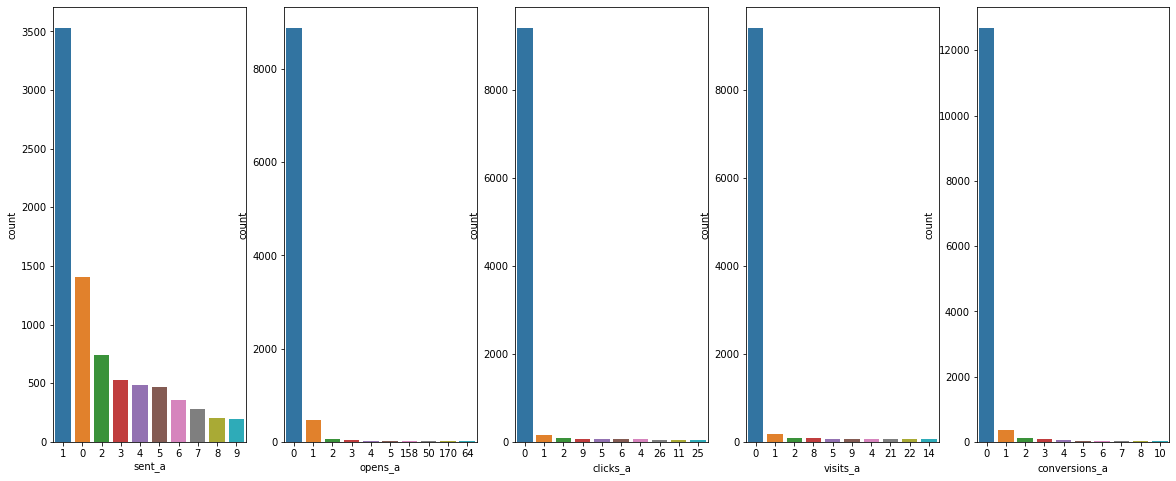

In [90]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(151)
sns.countplot(df_use_ab_1['sent_a'], order = df_use_ab_1['sent_a'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_use_ab_1['opens_a'], order = df_use_ab_1['opens_a'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_use_ab_1['clicks_a'], order = df_use_ab_1['clicks_a'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_use_ab_1['visits_a'], order = df_use_ab_1['visits_a'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_use_ab_1['conversions_a'], order = df_use_ab_1['conversions_a'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='conversions_b', ylabel='count'>

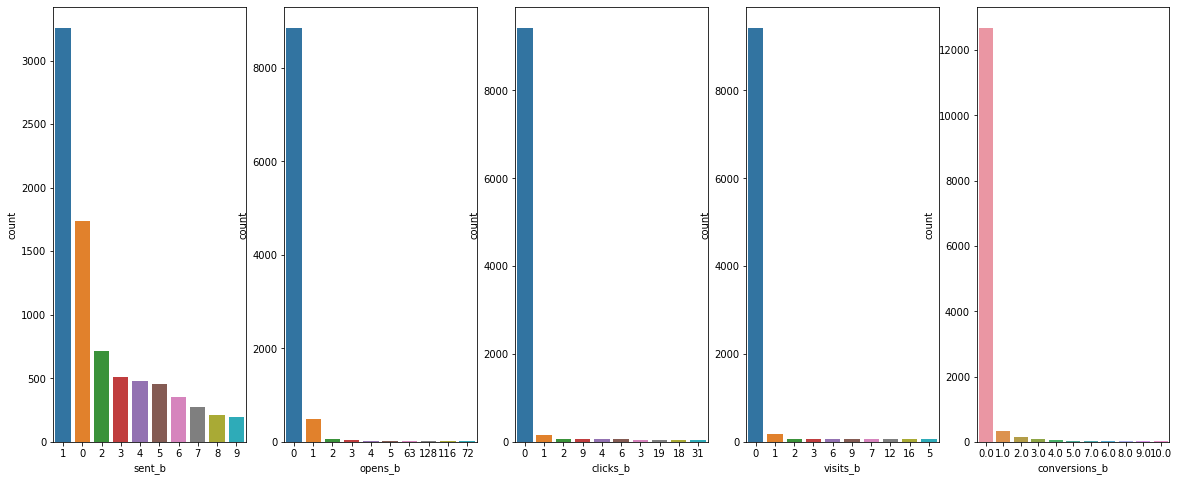

In [91]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(151)
sns.countplot(df_use_ab_1['sent_b'], order = df_use_ab_1['sent_b'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_use_ab_1['opens_b'], order = df_use_ab_1['opens_b'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_use_ab_1['clicks_b'], order = df_use_ab_1['clicks_b'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_use_ab_1['visits_b'], order = df_use_ab_1['visits_b'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_use_ab_1['conversions_b'], order = df_use_ab_1['conversions_b'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='id_send', ylabel='count'>

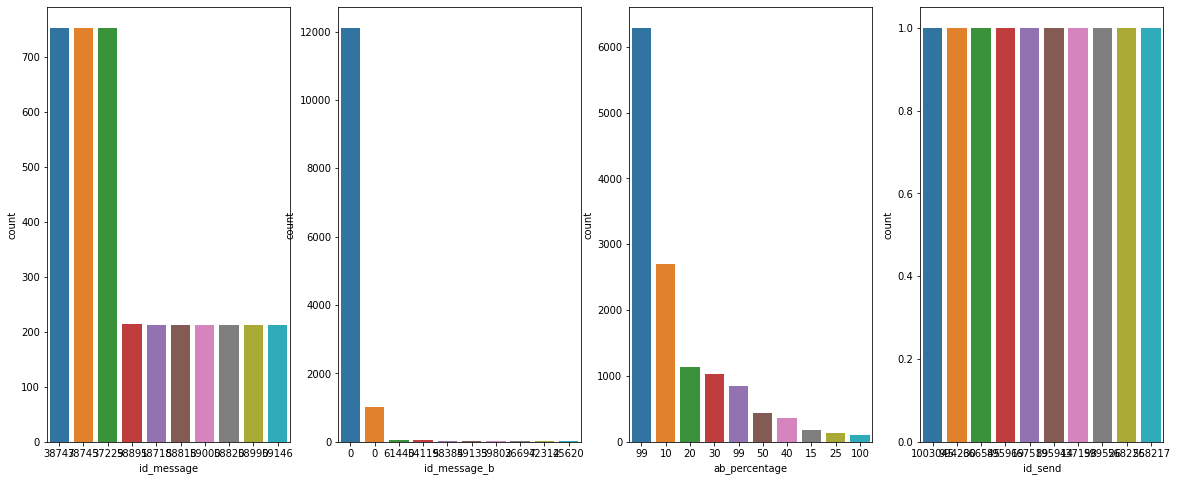

In [92]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_1['id_message'], order = df_use_ab_1['id_message'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_1['id_message_b'], order = df_use_ab_1['id_message_b'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_1['ab_percentage'], order = df_use_ab_1['ab_percentage'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_1['id_send'], order = df_use_ab_1['id_send'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='reads', ylabel='count'>

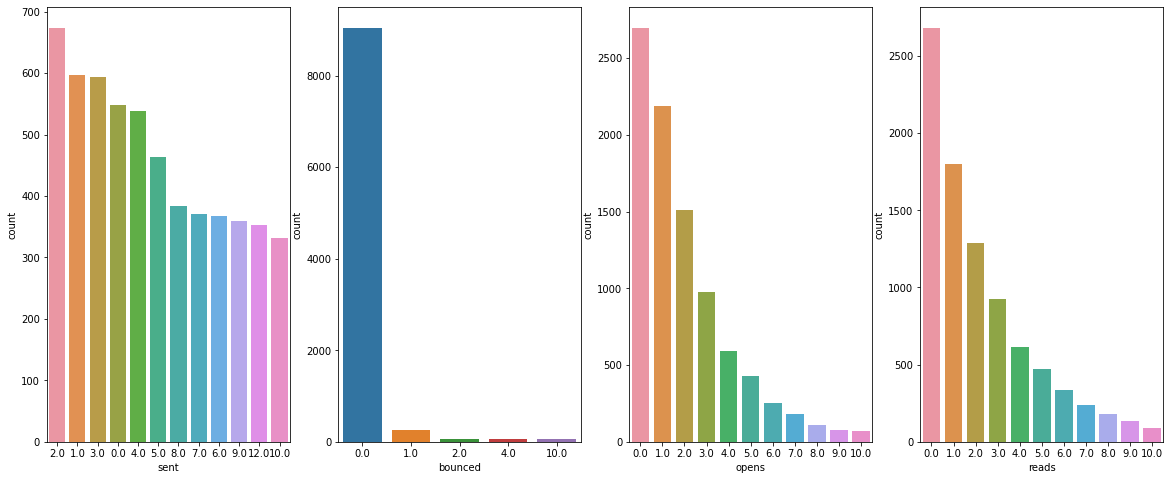

In [93]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_1['sent'], order = df_use_ab_1['sent'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_1['bounced'], order = df_use_ab_1['bounced'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_1['opens'], order = df_use_ab_1['opens'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_1['reads'], order = df_use_ab_1['reads'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='revenues', ylabel='count'>

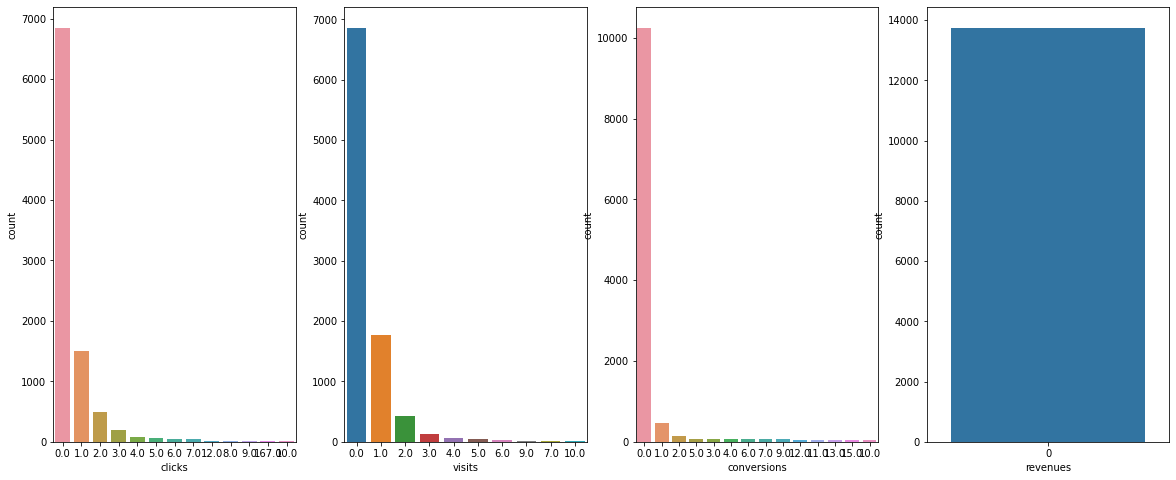

In [94]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_1['clicks'], order = df_use_ab_1['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_1['visits'], order = df_use_ab_1['visits'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_1['conversions'], order = df_use_ab_1['conversions'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_1['revenues'], order = df_use_ab_1['revenues'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='unsubscribes', ylabel='count'>

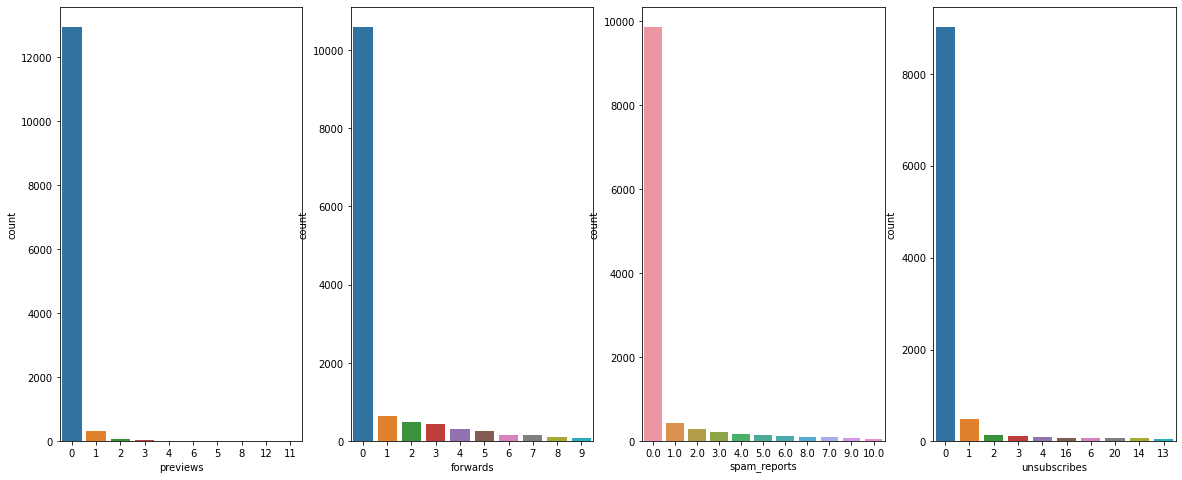

In [95]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_use_ab_1['previews'], order = df_use_ab_1['previews'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_use_ab_1['forwards'], order = df_use_ab_1['forwards'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_use_ab_1['spam_reports'], order = df_use_ab_1['spam_reports'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_use_ab_1['unsubscribes'], order = df_use_ab_1['unsubscribes'].value_counts(dropna = False)[:10].index)

In [96]:
df_use_ab_1.groupby(['unsubscribes','forwards','spam_reports'])[['conversions']].count().head()

conversions
unsubscribes forwards spam_reports             
0            0        0.0                  8899
                      1.0                    55
                      2.0                     8
                      3.0                     7
                      4.0                     5

In [97]:
df_use_ab_1.groupby(['previews','revenues','prints'])[['conversions']].count().head()

conversions
previews revenues prints             
0        0        0             10553
                  1               703
                  2               485
                  3               348
                  4               228

In [98]:
df_use_ab_1.groupby(['opens','clicks','reads','visits'])[['conversions']].count().head()

conversions
opens clicks reads visits             
0.0   0.0    0.0   0.0            2683
             1.0   0.0               7
             2.0   0.0               1
             3.0   0.0               1
             4.0   0.0               2

In [99]:
df_use_ab_1.head(2)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
22109,2676,0,9921,224390,2012-05-28 23:59:02,Cenový hit- náušnice kostky za bezkonkurenční ...,1,0,1,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
22154,2431,0,9925,224557,2012-05-29 14:39:02,SPORTIQUE Helps WBR Promote Worldwide 2-Wheel ...,1,0,1,0,325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [100]:
df_use_ab_1.apply(lambda x : len(x.unique())).head()

id_customer             121
id_agency_customer       64
id_message             1742
id_send               13748
date                  10782
dtype: int64

In [101]:
df_use_ab_1_top50 = df_use_ab_1['id_customer'].value_counts().head(50).index.to_list()

In [102]:
df_use_ab_1_top50Customers = df_use_ab_1[df_use_ab_1['id_customer'].isin(df_use_ab_1_top50)]

In [103]:
df_use_ab_1_top50Customers.shape,df_use_ab_1.shape

((13657, 34), (13748, 34))

In [104]:
df_use_ab_1_top50id_messages = df_use_ab_1_top50Customers['id_message'].value_counts().head(50).index.to_list()

In [105]:
df_use_ab_1_top50ID_Msgs = df_use_ab_1_top50Customers[df_use_ab_1_top50Customers['id_message'].isin(df_use_ab_1_top50id_messages)]

In [106]:
df_use_ab_1_top50ID_Msgs.shape

(10405, 34)

In [107]:
df_use_ab_1_top50ID_Msgs['subject'].value_counts()[:5]

Stačí tak málo, iba tri minúty denne ... Ale tie výsledky!                 753
Skontrolujte si, či máte všetko na čistenie zubov. Možno je čas doplniť    753
Podporujeme vašu vytrvalosť!                                               753
Prečo prehrať celú hru?                                                    753
Zkontrolujte si, zda máte vše na čištění zubů. Možná je čas doplnit        698
Name: subject, dtype: int64

In [108]:
df_use_ab_1_top50ID_Msgs[df_use_ab_1_top50ID_Msgs['conversions']==0].shape , df_use_ab_1_top50ID_Msgs[df_use_ab_1_top50ID_Msgs['conversions']!=0].shape

((8752, 34), (1653, 34))

In [109]:
#Focusing on top 1st customer
df_use_ab_1_top50ID_Msgs['id_customer'].value_counts()[:5]

9200    6635
7518    2259
7535     734
7792     434
8484     243
Name: id_customer, dtype: int64

In [110]:
df_9200 = df_use_ab_1_top50ID_Msgs[df_use_ab_1_top50ID_Msgs['id_customer']==9200]

In [111]:
df_9200.shape

(6635, 34)

# 9200 Customer where use_ab(A/B testing is True)

In [112]:
#Unique customer EDA
df_9200.apply(lambda x : len(x.unique())).head()

id_customer              1
id_agency_customer       1
id_message              32
id_send               6635
date                  3892
dtype: int64

In [113]:
df_9200['date'].min(), df_9200['date'].max()

('2017-08-17 08:52:12', '2018-04-16 15:00:04')

In [114]:
df_9200['ab_percentage'] = pd.to_numeric(df_9200['ab_percentage'])
df_9200['ab_percentage'] = df_9200['ab_percentage'].astype(int)  #.unique()  

In [115]:
df_9200['id_message'].value_counts()[:10]

58891    214
58718    213
59227    212
58814    212
58818    212
58820    212
58848    212
58895    212
58897    212
58898    212
Name: id_message, dtype: int64

In [116]:
df_9200['subject'].value_counts()[:5]

Skontrolujte si, či máte všetko na čistenie zubov. Možno je čas doplniť    753
Zkontrolujte si, zda máte vše na čištění zubů. Možná je čas doplnit        698
Víte, jak vybrat náhradní hlavičku ke svému elektrickému kartáčku?         402
Viete, ako vybrať náhradnú hlavičku ku svojej elektrickej kefke?           402
Skontrolujte si vlákna vašej kefky na zuby. Možno je čas na výmenu         361
Name: subject, dtype: int64

<AxesSubplot:xlabel='conversions_a', ylabel='count'>

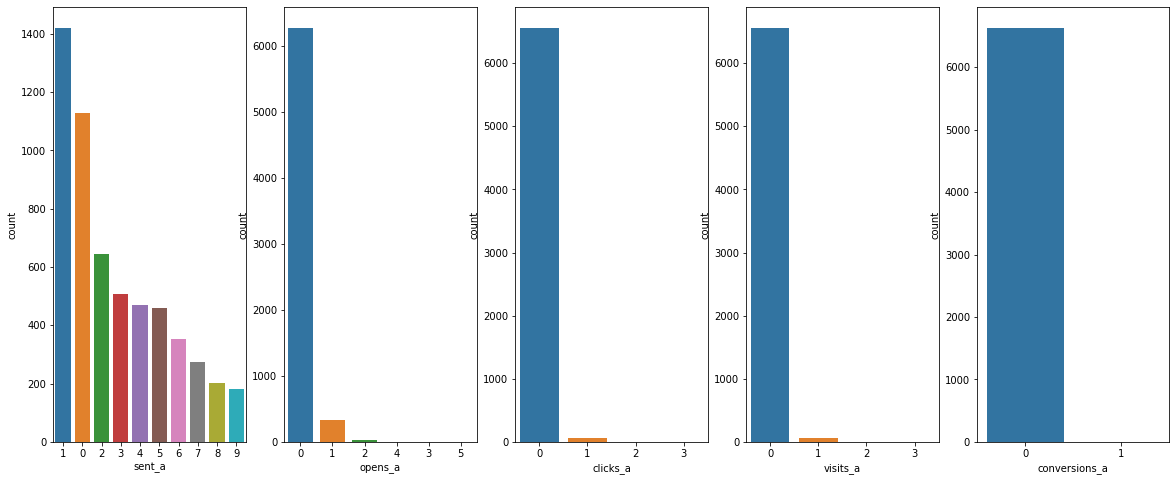

In [117]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(151)
sns.countplot(df_9200['sent_a'], order = df_9200['sent_a'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_9200['opens_a'], order = df_9200['opens_a'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_9200['clicks_a'], order = df_9200['clicks_a'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_9200['visits_a'], order = df_9200['visits_a'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_9200['conversions_a'], order = df_9200['conversions_a'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='conversions_b', ylabel='count'>

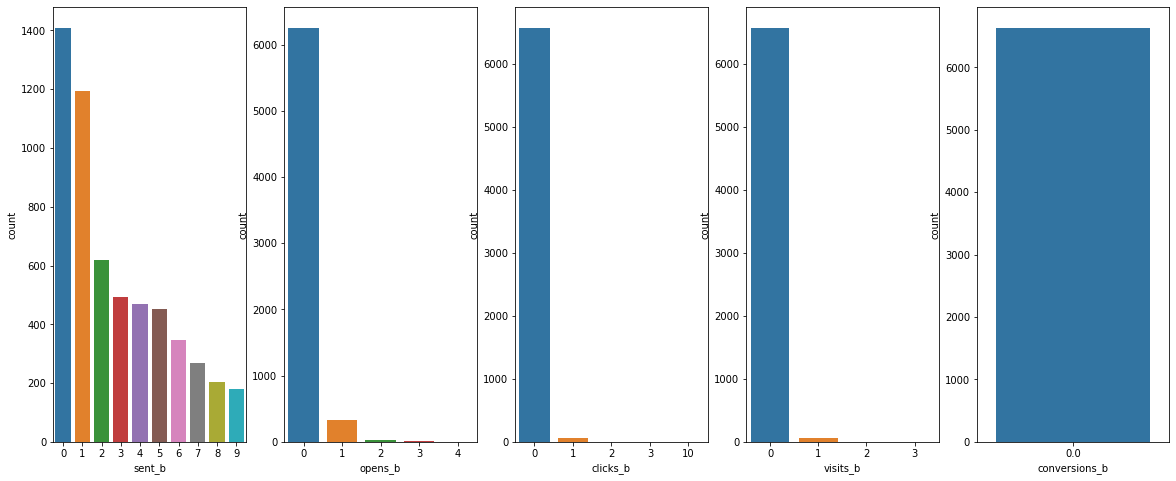

In [118]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(151)
sns.countplot(df_9200['sent_b'], order = df_9200['sent_b'].value_counts(dropna = False)[:10].index)
plt.subplot(152)
sns.countplot(df_9200['opens_b'], order = df_9200['opens_b'].value_counts(dropna = False)[:10].index)
plt.subplot(153)
sns.countplot(df_9200['clicks_b'], order = df_9200['clicks_b'].value_counts(dropna = False)[:10].index)
plt.subplot(154)
sns.countplot(df_9200['visits_b'], order = df_9200['visits_b'].value_counts(dropna = False)[:10].index)
plt.subplot(155)
sns.countplot(df_9200['conversions_b'], order = df_9200['conversions_b'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='id_send', ylabel='count'>

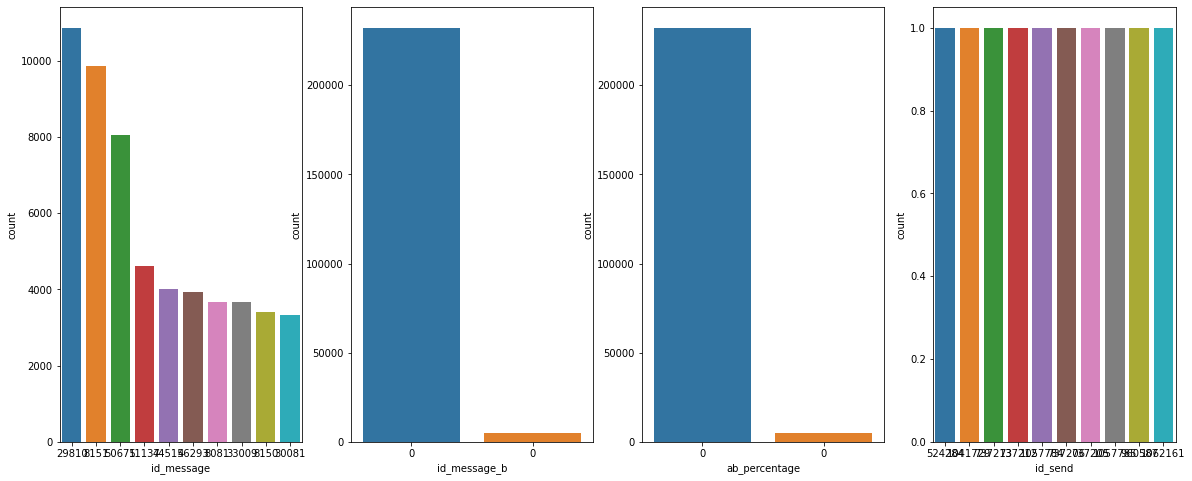

In [119]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_1['id_message'], order = df_1['id_message'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_1['id_message_b'], order = df_1['id_message_b'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_1['ab_percentage'], order = df_1['ab_percentage'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_1['id_send'], order = df_1['id_send'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='reads', ylabel='count'>

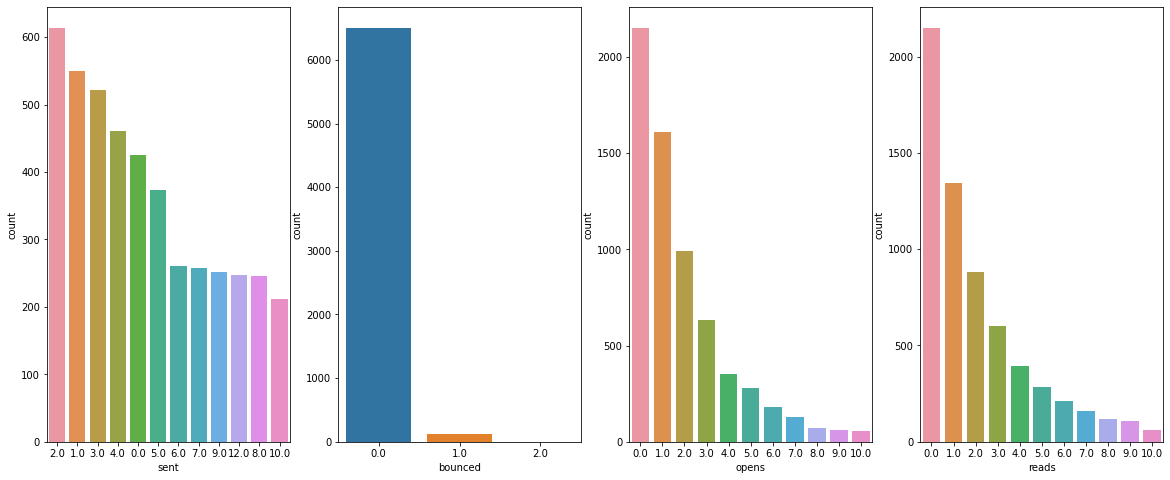

In [120]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_9200['sent'], order = df_9200['sent'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_9200['bounced'], order = df_9200['bounced'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_9200['opens'], order = df_9200['opens'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_9200['reads'], order = df_9200['reads'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='revenues', ylabel='count'>

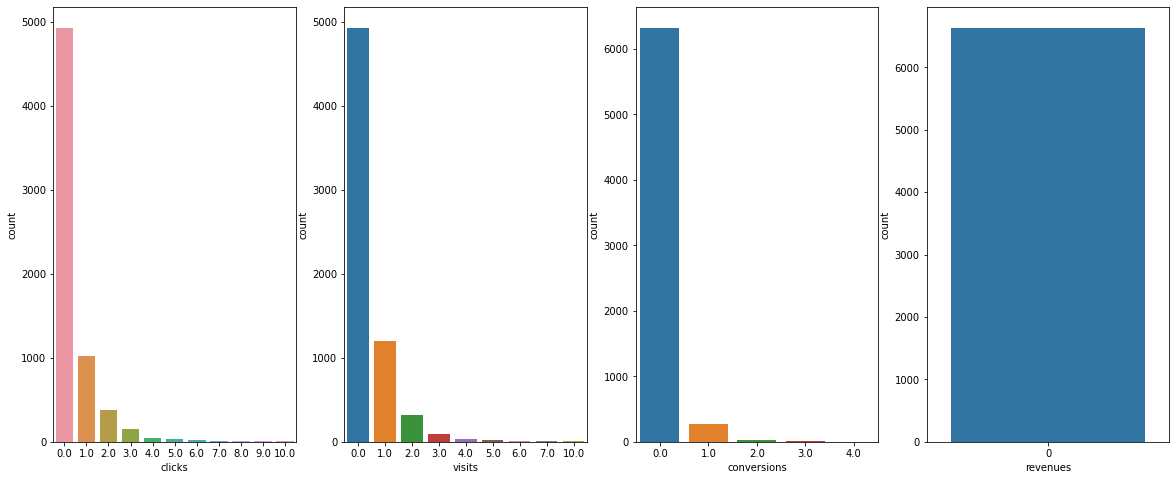

In [121]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_9200['clicks'], order = df_9200['clicks'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_9200['visits'], order = df_9200['visits'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_9200['conversions'], order = df_9200['conversions'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_9200['revenues'], order = df_9200['revenues'].value_counts(dropna = False)[:10].index)

<AxesSubplot:xlabel='unsubscribes', ylabel='count'>

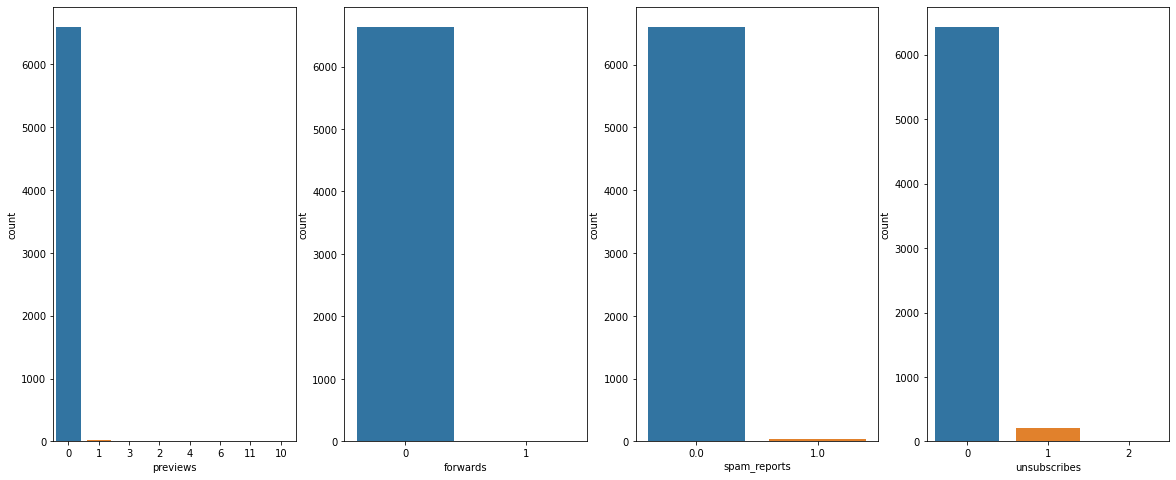

In [122]:
#Displaying top 10 customers , clicks and conversions data  
plt.figure(figsize =(20,8))
plt.subplot(141)
sns.countplot(df_9200['previews'], order = df_9200['previews'].value_counts(dropna = False)[:10].index)
plt.subplot(142)
sns.countplot(df_9200['forwards'], order = df_9200['forwards'].value_counts(dropna = False)[:10].index)
plt.subplot(143)
sns.countplot(df_9200['spam_reports'], order = df_9200['spam_reports'].value_counts(dropna = False)[:10].index)
plt.subplot(144)
sns.countplot(df_9200['unsubscribes'], order = df_9200['unsubscribes'].value_counts(dropna = False)[:10].index)


# Dealing with Customer 9200

***A/B testing is TRUE:***


14. Analyzed in depth with the customer 9200, since this id has lot of transcations in the campagain. with 6635 transcations.
15. He is been part of campagain from 2017-08-17 to 2018-04-16
16. This customer has received 2981 id_messages which is most for all the customers in this method.Most of them mails are sent to this customer where limited mails got bounced back. But customers actions on mail are limited
    by opening and reading it.And the conversions are very limited.
17. Similary same action is performed with differernt id_message(55891) for same customer.


# Appendix :

### With id_message 58891 and sbject as Skontrolujte si, či máte všetko na čistenie zubov. Možno je čas doplniť for customer 9200

In [123]:
df_9200[df_9200['id_message']==58891].head(2)

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
446777,9200,0,58891,964260,2017-09-15 13:00:26,Skontrolujte si vlákna vašej kefky na zuby. Mo...,1,0,99,8,0,2,2,1,1,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0.0
447230,9200,0,58891,965056,2017-09-16 13:04:48,Skontrolujte si vlákna vašej kefky na zuby. Mo...,1,0,99,8,0,2,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0.0


<AxesSubplot:>

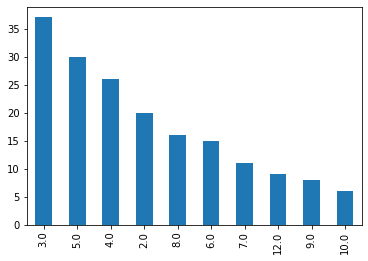

In [124]:
# Trying to plot for customer 2601 with id_message vs sent data
df_9200[df_9200['id_message']==58891]['sent'].value_counts().head(10).plot(kind='bar')  

In [125]:
df_9200[df_9200['id_message']==58891].groupby('sent')['bounced'].count().sort_values( ascending = False).head(10)

sent
3.0     37
5.0     30
4.0     26
2.0     20
8.0     16
6.0     15
7.0     11
12.0     9
9.0      8
10.0     6
Name: bounced, dtype: int64

<AxesSubplot:>

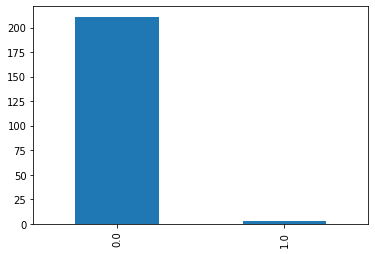

In [126]:
df_9200[df_9200['id_message']==58891]['bounced'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

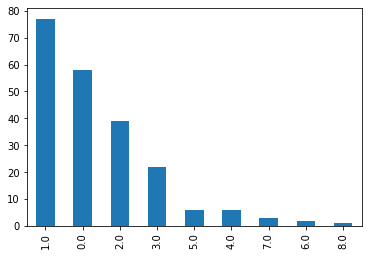

In [127]:
df_9200[df_9200['id_message']==58891]['opens'].value_counts().plot(kind='bar')

<AxesSubplot:>

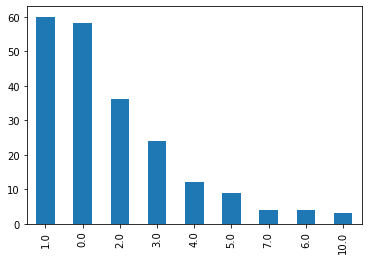

In [128]:
df_9200[df_9200['id_message']==58891]['reads'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

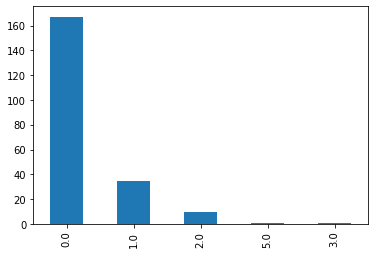

In [129]:
df_9200[df_9200['id_message']==58891]['clicks'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

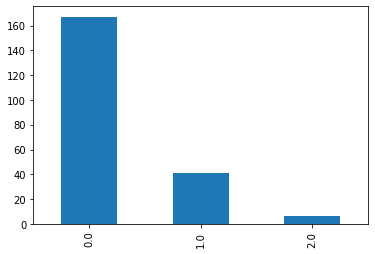

In [130]:
df_9200[df_9200['id_message']==58891]['visits'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

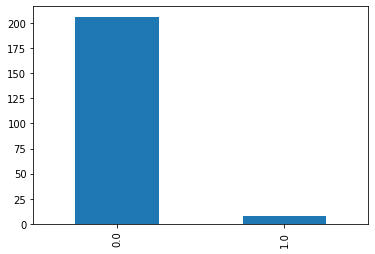

In [131]:
df_9200[df_9200['id_message']==58891]['conversions'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

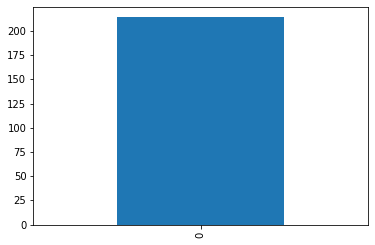

In [132]:
df_9200[df_9200['id_message']==58891]['revenues'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

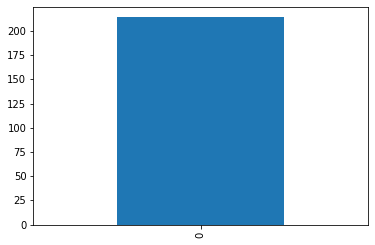

In [133]:
df_9200[df_9200['id_message']==58891]['prints'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

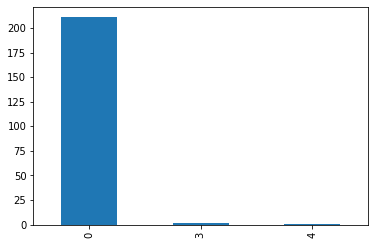

In [134]:
df_9200[df_9200['id_message']==58891]['previews'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

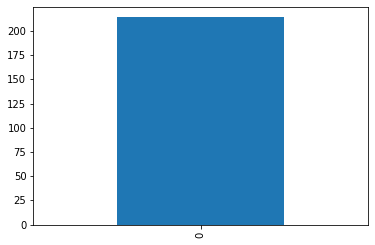

In [135]:
df_9200[df_9200['id_message']==58891]['forwards'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

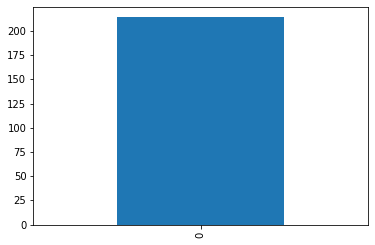

In [136]:
df_9200[df_9200['id_message']==58891]['spam_reports'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

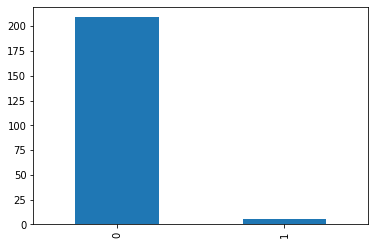

In [137]:
df_9200[df_9200['id_message']==58891]['unsubscribes'].value_counts().head(10).plot(kind='bar')

In [138]:
df_9200.groupby(['sent','id_message','subject'])[['bounced']].count().sort_values(by='bounced', ascending = False)

bounced
sent  id_message subject                                                    
0.0   59085      Viete, ako zásadne predĺžiť životnosť vášho hol...      128
1.0   59000      Víte, jak zásadně prodloužit životnost vašeho h...       62
2.0   59083      Ťahá vás holenie? Je čas na novú holiacu hlavu           55
1.0   59083      Ťahá vás holenie? Je čas na novú holiacu hlavu           52
2.0   59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...       52
      59084      Viete, prečo holenie nie je pohodlné ako pred r...       52
      59200      Viete, ako správne vybrať medzizubnú kefku? Je ...       51
      58895      Skontrolujte si, či máte všetko na čistenie zub...       50
1.0   59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...       49
      59085      Viete, ako zásadne predĺžiť životnosť vášho hol...       48
0.0   59000      Víte, jak zásadně prodloužit životnost vašeho h...       48
2.0   58897      Skontrolujte si, či máte všetko na čistenie zub...       48
1.0   58895      Skontrolujte si, či máte všetko na čistenie zub...       48
3.0   59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...       43
0.0   59083      Ťahá vás holenie? Je čas na novú holiacu hlavu           42
3.0   58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...       42
      59202      Viete to podstatné o čistení zubov?                      39
1.0   59084      Viete, prečo holenie nie je pohodlné ako pred r...       39
3.0   59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...       37
2.0   59202      Viete to podstatné o čistení zubov?                      37
4.0   59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...       36
3.0   59165      Skontrolujte si, či máte všetko na čistenie zub...       35
2.0   59000      Víte, jak zásadně prodloužit životnost vašeho h...       35
3.0   59084      Viete, prečo holenie nie je pohodlné ako pred r...       35
5.0   59202      Viete to podstatné o čistení zubov?                      35
4.0   59202      Viete to podstatné o čistení zubov?                      35
2.0   59165      Skontrolujte si, či máte všetko na čistenie zub...       33
0.0   59084      Viete, prečo holenie nie je pohodlné ako pred r...       32
1.0   59200      Viete, ako správne vybrať medzizubnú kefku? Je ...       32
3.0   59200      Viete, ako správne vybrať medzizubnú kefku? Je ...       32
4.0   58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...       32
3.0   58895      Skontrolujte si, či máte všetko na čistenie zub...       31
      58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...       31
2.0   59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...       31
      58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...       31
5.0   59165      Skontrolujte si, či máte všetko na čistenie zub...       31
1.0   58897      Skontrolujte si, či máte všetko na čistenie zub...       31
4.0   58897      Skontrolujte si, či máte všetko na čistenie zub...       30
      59165      Skontrolujte si, či máte všetko na čistenie zub...       28
1.0   59165      Skontrolujte si, či máte všetko na čistenie zub...       27
3.0   59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...       27
1.0   59202      Viete to podstatné o čistení zubov?                      27
12.0  59189      Víte jak vybrat správně zubní kartáček? Je to s...       27
3.0   59083      Ťahá vás holenie? Je čas na novú holiacu hlavu           27
4.0   59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...       26
5.0   59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...       26
3.0   58897      Skontrolujte si, či máte všetko na čistenie zub...       26
12.0  58814      Zkontrolujte si, zda máte vše na čištění zubů. ...       26
5.0   58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...       24
4.0   59200      Viete, ako správne vybrať medzizubnú kefku? Je ...       24
      59194      Viete, ako správne vybrať zubnú kefku? Je to ľa.

In [139]:
df_9200.groupby(['opens','id_message','subject'])[['reads']].count().sort_values(by='reads', ascending = False)

reads
opens id_message subject                                                  
0.0   59085      Viete, ako zásadne predĺžiť životnosť vášho hol...    169
      59000      Víte, jak zásadně prodloužit životnost vašeho h...    139
      59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...    122
      59083      Ťahá vás holenie? Je čas na novú holiacu hlavu        122
      59202      Viete to podstatné o čistení zubov?                   121
      58895      Skontrolujte si, či máte všetko na čistenie zub...    115
      59084      Viete, prečo holenie nie je pohodlné ako pred r...    111
      59165      Skontrolujte si, či máte všetko na čistenie zub...    109
      59200      Viete, ako správne vybrať medzizubnú kefku? Je ...     96
      58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...     93
      58897      Skontrolujte si, či máte všetko na čistenie zub...     92
      59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...     82
      59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...     74
1.0   59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...     72
      59192      Víte to podstatné o čištění zubů? Přesvědčte se        70
0.0   59192      Víte to podstatné o čištění zubů? Přesvědčte se        69
1.0   59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...     68
      58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...     66
      58897      Skontrolujte si, či máte všetko na čistenie zub...     66
      59200      Viete, ako správne vybrať medzizubnú kefku? Je ...     62
      59146      Zkontrolujte si, zda máte vše na čištění zubů. ...     61
      58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...     61
0.0   58838      Skontrolujte si, či máte všetko na čistenie zub...     60
1.0   59202      Viete to podstatné o čistení zubov?                    59
      59165      Skontrolujte si, či máte všetko na čistenie zub...     58
      59084      Viete, prečo holenie nie je pohodlné ako pred r...     57
      59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...     57
2.0   59224      Víte, jak vybrat náhradní hlavičku ke svému ele...     57
1.0   58895      Skontrolujte si, či máte všetko na čistenie zub...     56
0.0   59146      Zkontrolujte si, zda máte vše na čištění zubů. ...     56
1.0   59203      Viete, ako správne vybrať zubnú pastu? Je to ľa...     55
      59189      Víte jak vybrat správně zubní kartáček? Je to s...     52
      59083      Ťahá vás holenie? Je čas na novú holiacu hlavu         52
      59224      Víte, jak vybrat náhradní hlavičku ke svému ele...     51
      58990      Tahá Vás holení? Je čas na novou holicí hlavu          51
2.0   58814      Zkontrolujte si, zda máte vše na čištění zubů. ...     48
0.0   58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...     45
1.0   58814      Zkontrolujte si, zda máte vše na čištění zubů. ...     45
2.0   59203      Viete, ako správne vybrať zubnú pastu? Je to ľa...     44
      59226      Víte, jak vybrat náhradní hlavičku ke svému ele...     44
1.0   58838      Skontrolujte si, či máte všetko na čistenie zub...     43
0.0   59189      Víte jak vybrat správně zubní kartáček? Je to s...     42
2.0   59191      Víte jak vybrat správně mezizubní kartáček? Je ...     41
1.0   58994      Víte, proč holení není pohodlné jako před rokem...     41
2.0   59146      Zkontrolujte si, zda máte vše na čištění zubů. ...     40
      58994      Víte, proč holení není pohodlné jako před rokem...     40
3.0   58818      Zkontrolujte si, zda máte vše na čištění zubů. ...     39
2.0   59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...     39
      58990      Tahá Vás holení? Je čas na novou holicí hlavu          39
1.0   59226      Víte, jak vybrat náhradní hlavičku ke svému ele...     39
3.0   58990      Tahá Vás holení? Je čas na novou holicí hlavu          38
      58814      Zkontrolujte si, zda máte vše na čištění zubů. ...     38
      59191      Ví

In [140]:
df_9200.groupby(['clicks','id_message','subject'])[['visits']].count().sort_values(by='visits', ascending = False)

visits
clicks id_message subject                                                   
0.0    59202      Viete to podstatné o čistení zubov?                    203
       59085      Viete, ako zásadne predĺžiť životnosť vášho hol...     187
       59000      Víte, jak zásadně prodloužit životnost vašeho h...     184
       59165      Skontrolujte si, či máte všetko na čistenie zub...     184
       59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...     181
       59200      Viete, ako správne vybrať medzizubnú kefku? Je ...     181
       58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...     175
       59083      Ťahá vás holenie? Je čas na novú holiacu hlavu         175
       59084      Viete, prečo holenie nie je pohodlné ako pred r...     173
       58897      Skontrolujte si, či máte všetko na čistenie zub...     173
       59192      Víte to podstatné o čištění zubů? Přesvědčte se        173
       58895      Skontrolujte si, či máte všetko na čistenie zub...     172
       59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...     170
       59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...     165
       59146      Zkontrolujte si, zda máte vše na čištění zubů. ...     156
       58838      Skontrolujte si, či máte všetko na čistenie zub...     151
       59189      Víte jak vybrat správně zubní kartáček? Je to s...     136
       58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...     136
       59226      Víte, jak vybrat náhradní hlavičku ke svému ele...     134
       58990      Tahá Vás holení? Je čas na novou holicí hlavu          133
       58814      Zkontrolujte si, zda máte vše na čištění zubů. ...     131
       59203      Viete, ako správne vybrať zubnú pastu? Je to ľa...     131
       59224      Víte, jak vybrat náhradní hlavičku ke svému ele...     129
       58818      Zkontrolujte si, zda máte vše na čištění zubů. ...     113
       59191      Víte jak vybrat správně mezizubní kartáček? Je ...     112
       59064      Víte, jak zásadně prodloužit životnost vašeho h...      98
       58848      Zkontrolujte si, vlákna vašeho kartáčku na zuby...      77
       58994      Víte, proč holení není pohodlné jako před rokem...      77
1.0    58848      Zkontrolujte si, vlákna vašeho kartáčku na zuby...      71
0.0    59193      Víte jak vybrat správně zubní pastu? Je to snad...      69
1.0    59193      Víte jak vybrat správně zubní pastu? Je to snad...      57
0.0    58820      Zkontrolujte si, zda máte vše na čištění zubů. ...      50
1.0    58818      Zkontrolujte si, zda máte vše na čištění zubů. ...      47
       59226      Víte, jak vybrat náhradní hlavičku ke svému ele...      46
       59064      Víte, jak zásadně prodloužit životnost vašeho h...      45
       59224      Víte, jak vybrat náhradní hlavičku ke svému ele...      44
       59191      Víte jak vybrat správně mezizubní kartáček? Je ...      43
       58820      Zkontrolujte si, zda máte vše na čištění zubů. ...      43
       58994      Víte, proč holení není pohodlné jako před rokem...      43
       59203      Viete, ako správne vybrať zubnú pastu? Je to ľa...      41
       58814      Zkontrolujte si, zda máte vše na čištění zubů. ...      40
       58990      Tahá Vás holení? Je čas na novou holicí hlavu           38
2.0    59193      Víte jak vybrat správně zubní pastu? Je to snad...      37
1.0    59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...      35
0.0    58994      Víte, proč holení není pohodlné jako před rokem...      35
       58718      Zkontrolujte si vlákna vašeho kartáčku na zuby....      34
1.0    59146      Zkontrolujte si, zda máte vše na čištění zubů. ...      29
       59192      Víte to podstatné o čištění zubů? Přesvědčte se         28
       59189      Víte jak vybrat správně zubní kartáček? Je to s...      27
0.0    58718      Zkontrolujte si vlákna vašeho kartáčku na zuby....      27
1.0    58891      Skontrolujte si vlákna vašej kefky na zuby. Mož.

In [141]:
df_9200.groupby(['forwards','id_message','subject'])[['spam_reports']].count() .sort_values(by='spam_reports', ascending = False)

spam_reports
forwards id_message subject                                                         
0        59192      Víte to podstatné o čištění zubů? Přesvědčte se              212
         59202      Viete to podstatné o čistení zubov?                          212
         59226      Víte, jak vybrat náhradní hlavičku ke svému ele...           212
         59227      Viete, ako vybrať náhradnú hlavičku ku svojej e...           210
         59224      Víte, jak vybrat náhradní hlavičku ke svému ele...           190
         59203      Viete, ako správne vybrať zubnú pastu? Je to ľa...           190
         59225      Viete, ako vybrať náhradnú hlavičku ku svojej e...           190
         59200      Viete, ako správne vybrať medzizubnú kefku? Je ...           190
         59194      Viete, ako správne vybrať zubnú kefku? Je to ľa...           190
         59193      Víte jak vybrat správně zubní pastu? Je to snad...           190
         58897      Skontrolujte si, či máte všetko na čistenie zub...           190
         59191      Víte jak vybrat správně mezizubní kartáček? Je ...           190
         59189      Víte jak vybrat správně zubní kartáček? Je to s...           190
         59165      Skontrolujte si, či máte všetko na čistenie zub...           190
         59146      Zkontrolujte si, zda máte vše na čištění zubů. ...           190
         59085      Viete, ako zásadne predĺžiť životnosť vášho hol...           190
         59084      Viete, prečo holenie nie je pohodlné ako pred r...           190
         59000      Víte, jak zásadně prodloužit životnost vašeho h...           190
         58990      Tahá Vás holení? Je čas na novou holicí hlavu                190
         58898      Skontrolujte si vlákna vašej kefky na zuby. Mož...           190
         59083      Ťahá vás holenie? Je čas na novú holiacu hlavu               190
         58848      Zkontrolujte si, vlákna vašeho kartáčku na zuby...           190
         58818      Zkontrolujte si, zda máte vše na čištění zubů. ...           190
         58895      Skontrolujte si, či máte všetko na čistenie zub...           190
         58814      Zkontrolujte si, zda máte vše na čištění zubů. ...           189
         59064      Víte, jak zásadně prodloužit životnost vašeho h...           189
         58838      Skontrolujte si, či máte všetko na čistenie zub...           183
         58891      Skontrolujte si vlákna vašej kefky na zuby. Mož...           171
         58994      Víte, proč holení není pohodlné jako před rokem...           143
         58820      Zkontrolujte si, zda máte vše na čištění zubů. ...           127
         58718      Zkontrolujte si vlákna vašeho kartáčku na zuby....            77
         59320      Waren Sie mit dem Einkauf auf Dentmania.de zufr...            67
         58820      Zkontrolujte si, zda máte vše na čištění zubů. ...            62
         58718      Zkontrolujte si vlákna vašeho kartáčku na zuby....            49
         58994      Víte, proč holení není pohodlné jako před rokem...            47
         58718      Zkontrolujte si vlákna vašeho kartáčku na zuby....            43
                    Nejspíše je čas na výměnu hlavice vašeho zubníh...            24
         59193      Vyberte si pro sebe tu nejvhodnější zubní pastu...            22
         59194      Kvalitná kefka nemusí byť vôbec drahá, vo videu...            22
         58820      Doplňte si zubní pastu, nejspíše vám dochází                  22
         58897      Doplňte si medzizubné kefky, pravdepodobne už v...            22
         59200      Video a článok - Ako si správne vybrať zubnú kefku            22
         58818      Doplňte si mezizubní kartáčky, nejspíše už vám ...            22
         58814      Váš zubní kartáček už nejspíš potřebuje vyměnit...            22
         59224      Nechte si od specialistů poradit s výběrem hlav...            22
         59225      Nechajte si od špecialistov poradiť s výberom h...       

### Observations :

1. Focusing on top 50 customers whose A/B testing is True , why top 50 is the other customers has 1 or 2 data so Im ignoring it.
2. From the above step, filtering on campaign id which has top 50.
3. Now, my focus will be on top 50 customers and top 50 campaogn ids
4. A/B testing conversion with subject "Prečo prehrať celú hru?" is most used subject.
5. Choosing customer_id as 9200 with 6635 transactions
6. customer is part of the campagin from 2017-08-17 to 2018-04-16

***In this part, I didnt convert the transformation of other than 0 values to 1 . I took the data as it is***

7. id_message 59085 had 128 transactions and subject Viete, ako zásadne predĺžiť životnosť vášho holiaceho strojčeka? 	  with 128 transactions
8. For id_message (59202 with subject "Viete, ako zásadne predĺžiť životnosť vášho holiaceho strojčeka?" it got bounced   128 times when sent is not successful) and    for successfully sent for id_message 34848 with subject Skontrolujte    si, či máte všetko na čistenie zubov. Možno je čas doplniť and got bounced 123 times
9. For id_message (59202 with subject "Viete to podstatné o čistení zubov?" did not open 203 times and for successfully read for id_message 58848 with subject Zkontrolujte si, vlákna vašeho kartáčku na zuby. Možná je čas doplnit and got reads 71 times
10. For id_message (59192,59202,59226 with subject "Víte to podstatné o čištění zubů? Přesvědčte se","Viete to podstatné o čistení zubov?","Víte, jak vybrat náhradní hlavičku ke svému elektrickému kartáčku?" marked as spam 212 times


# Appendix:

### Method #3

18. The same is done for all the data without considering A/B testing

***Additional Steps:***

19. Taking a sample from population
20. Checked for correlation and multicollinearity


In [142]:
df.columns

Index(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date', 'subject', 'use_ab', 'id_message_b', 'ab_percentage', 'sent', 'bounced', 'opens', 'reads', 'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews', 'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'], dtype='object')

<AxesSubplot:>

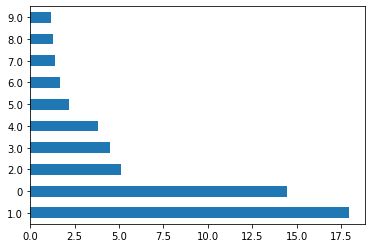

In [143]:
(df['sent'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

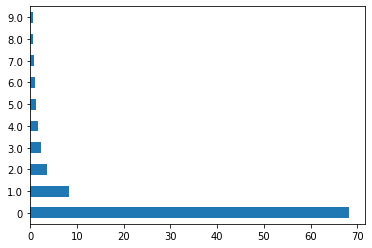

In [144]:
(df['bounced'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

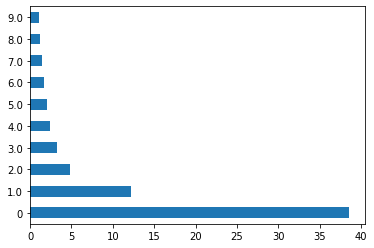

In [145]:
(df['opens'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

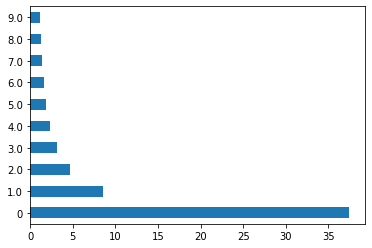

In [146]:
(df['reads'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

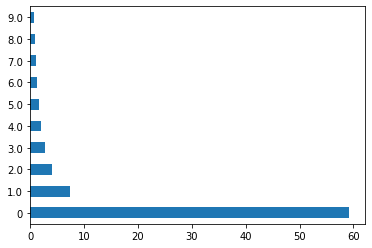

In [147]:
(df['clicks'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

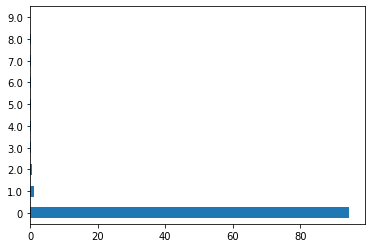

In [148]:
(df['conversions'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

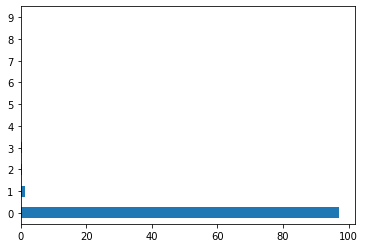

In [149]:
(df['prints'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

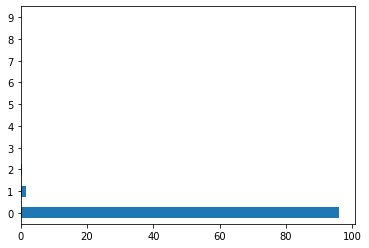

In [150]:
(df['previews'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

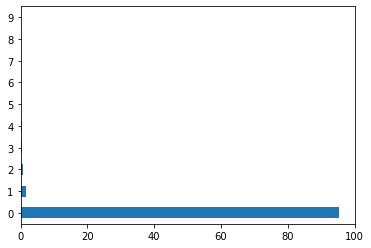

In [151]:
(df['forwards'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

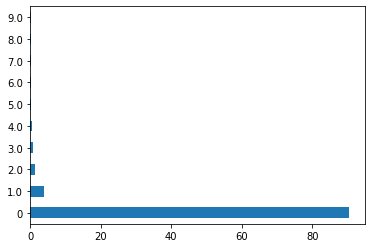

In [152]:
(df['spam_reports'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

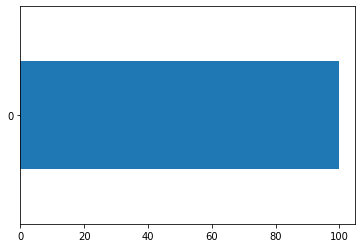

In [153]:
(df['revenues'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

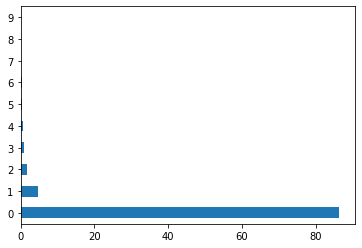

In [154]:
(df['unsubscribes'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

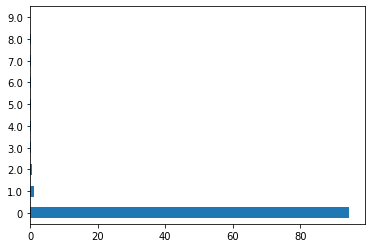

In [155]:
(df['conversions'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

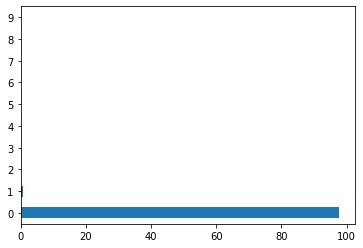

In [156]:
(df['sent_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

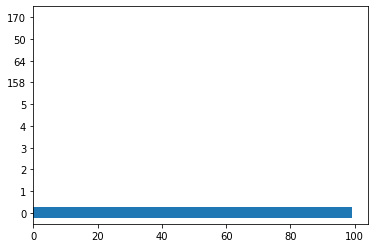

In [157]:
(df['opens_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

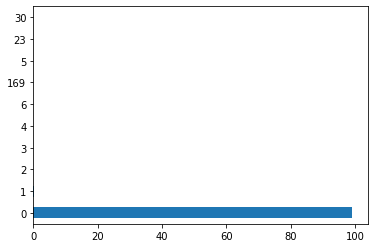

In [158]:
(df['reads_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

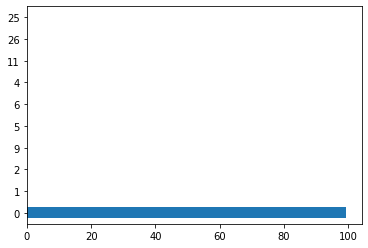

In [159]:
(df['clicks_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

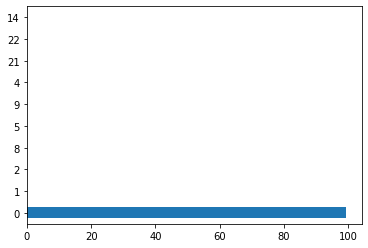

In [160]:
(df['visits_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

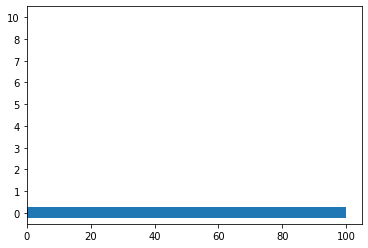

In [161]:
(df['conversions_a'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

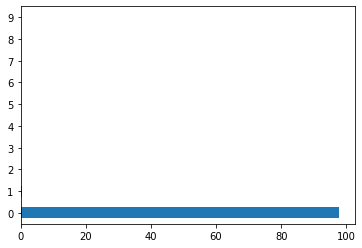

In [162]:
(df['sent_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

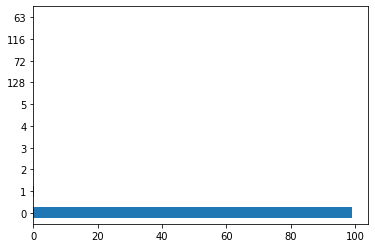

In [163]:
(df['opens_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

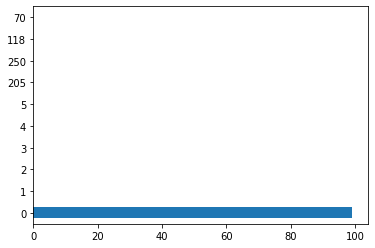

In [164]:
(df['reads_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

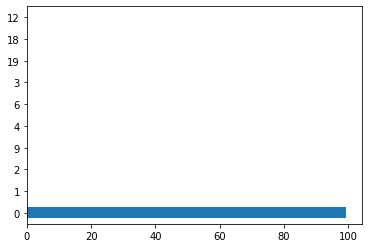

In [165]:
(df['clicks_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

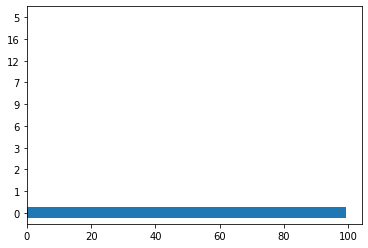

In [166]:
(df['visits_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

<AxesSubplot:>

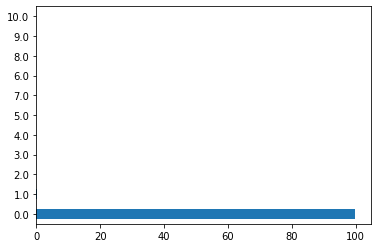

In [167]:
(df['conversions_b'].value_counts(normalize = True)*100).sort_values(ascending = False)[:10].plot(kind='barh')

In [168]:
df[df['subject']=='XXXchatcams.com News']

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
2,3,0,12,125,2006-01-24 01:53:44,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,3,0,12,126,2006-01-24 02:03:44,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,3,0,12,129,2006-02-18 15:13:01,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,3,0,12,130,2006-02-22 23:42:54,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8,3,0,12,146,2006-03-03 01:32:40,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
9,3,0,12,159,2006-03-16 21:07:19,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
10,3,0,12,170,2006-04-10 23:16:38,XXXchatcams.com News,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [169]:
df['ab_percentage'] = df['ab_percentage'].replace({'100':100, '10' :10, '0' :0,'15':15,
                                                   '10':10,'50':50,'20':20,'40':40,'30':30,'25':25})

In [170]:
df['sent'].replace('1.00',1,inplace= True)
df['sent'] =df['sent'].astype(int)

In [171]:
df['bounced'] = pd.to_numeric(df['bounced'])
df['bounced']=df['bounced'].astype(int)  
df['conversions_b'] = pd.to_numeric(df['conversions_b'])
df['conversions_b']=df['conversions_b'].astype(int)
df['visits'] = pd.to_numeric(df['visits'])
df['visits']=df['visits'].astype(int) 
df['opens'] = pd.to_numeric(df['opens'])
df['opens']=df['opens'].astype(int) 
df['reads'] = pd.to_numeric(df['reads'])
df['reads']=df['reads'].astype(int) 
df['clicks'] = pd.to_numeric(df['clicks'])
df['clicks']=df['clicks'].astype(int) 
df['conversions'] = pd.to_numeric(df['conversions'])
df['conversions']=df['conversions'].astype(int) 
df['prints']=df['prints'].astype(int) 
df['previews']=df['previews'].astype(int) 
df['forwards']=df['forwards'].astype(int) 
df['spam_reports'] = pd.to_numeric(df['spam_reports'])
df['spam_reports']=df['spam_reports'].astype(int) 
df['unsubscribes']=df['unsubscribes'].astype(int)
df['sent_a']=df['sent_a'].astype(int)
df['opens_a']=df['opens_a'].astype(int)
df['reads_a']=df['reads_a'].astype(int)
df['clicks_a']=df['clicks_a'].astype(int)
df['visits_a']=df['visits_a'].astype(int)
df['sent_b']=df['sent_b'].astype(int)
df['opens_b']=df['opens_b'].astype(int)
df['reads_b']=df['reads_b'].astype(int)
df['clicks_b']=df['clicks_b'].astype(int)
df['visits_b']=df['visits_b'].astype(int)
df['conversions_b']=df['conversions_b'].astype(int)

In [172]:
df.head()

,id_customer,id_agency_customer,id_message,id_send,date,subject,use_ab,id_message_b,ab_percentage,sent,bounced,opens,reads,clicks,visits,conversions,revenues,prints,previews,forwards,spam_reports,unsubscribes,sent_a,opens_a,reads_a,clicks_a,visits_a,conversions_a,sent_b,opens_b,reads_b,clicks_b,visits_b,conversions_b
1,5,0,10,41,2005-12-08 21:03:59,Airfoil PR NEWS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,12,125,2006-01-24 01:53:44,XXXchatcams.com News,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,12,126,2006-01-24 02:03:44,XXXchatcams.com News,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,12,129,2006-02-18 15:13:01,XXXchatcams.com News,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,0,12,130,2006-02-22 23:42:54,XXXchatcams.com News,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
df_copy = df.copy()

In [174]:
df_copy.columns

Index(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date', 'subject', 'use_ab', 'id_message_b', 'ab_percentage', 'sent', 'bounced', 'opens', 'reads', 'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews', 'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'], dtype='object')

In [175]:
#Dropping these columns because it contains constant and Quasi-constant features
df_copy.drop([  'conversions', 'prints', 'previews', 'forwards', 'spam_reports', 
              'unsubscribes', 'sent_a', 'opens_a', 'reads_a', 'clicks_a', 'visits_a', 'conversions_a',
              'sent_b', 'opens_b', 'reads_b', 'clicks_b', 'visits_b', 'conversions_b'], axis =1, inplace = True)

# Taking a Sample from Population

In [176]:
# Took a sample set of data from population
Data_Sample = df_copy.sample(frac =0.3)
Data_Sample.shape

(170294, 16)

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(Data_Sample.corr()[Data_Sample.corr().abs()>0.1],annot=True)

<AxesSubplot:>


***1. From the above you can understand that Multi-collinearity exists***

***2. Reads,clicks opens and visits are highly positively correlated***


In [ ]:
import statsmodels.api as sm
import warnings
from pandas import DataFrame,Series
from scipy import stats

In [ ]:
Data_Sample_copy = Data_Sample.copy()

In [ ]:
Data_Sample_copy.columns

In [ ]:
Data_Sample_copy.drop(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date', 'subject','id_message_b'],axis =1, inplace = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train1 = Data_Sample_copy
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Appendeix

In [ ]:
print('The Number Of Unique values is',  data.apply(lambda x : len(x.unique())))

# Dataset Link :
https://drive.google.com/file/d/1-QWySpBlVeX5RznBpc1b8B9S8YAv09Rj/view?usp=sharing